## Entrega Final - Curso Data Science (CoderHouse)
### Maite Ugalde

- Antecedentes

En la actualidad, en Argentina el acceso a la educación primaria y secundaria es un derecho y obligación sin embargo, la deserción escolar aumenta a medida que se avanza en los niveles educativos. En poblaciones con menores recursos, especialmente en áreas rurales o más alejadas, la desigualdad en el acceso a la educación es más pronunciada, agravada por factores económicos y sociales. Esto genera una brecha educativa que se refleja en la empleabilidad y el ingreso a lo largo del tiempo, reforzando las desigualdades socioeconómicas estructurales. Según la Encuesta Permanente de Hogares (EPH), los niveles de informalidad laboral y el acceso desigual a servicios educativos y de salud son mayores en áreas rurales y pequeñas ciudades.

Para intentar mejorar las perspectivas socioeconómicas a largo plazo, es clave entender el nivel educativo de la sociedad, ya que la educación es uno de los principales motores de movilidad social y un determinante clave del desarrollo económico y social. Aquellos con niveles educativos más bajos tienden a tener empleos informales, menores ingresos y acceso limitado a oportunidades, perpetuando ciclos de pobreza e inestabilidad laboral.

- Objetivo

Dado que las condiciones socioeconómicas suelen ser una de las consecuencias del nivel educativo de los adultos, el presente modelo intentará explorar cómo el nivel educativo de los adultos impacta en diversas variables socioeconómicas, y cómo estas varían según el lugar de residencia de la persona. Es decir, teniendo una persona con X condiciones socioeconómicas (empleo, ingresos, vivienda, acceso a servicios de salud), ¿cuál es la probabilidad de que cuente con cierto nivel educativo? ¿Cómo varían estas probabilidades según el lugar de la Argentina de residencia?

Para poder conseguir el objetivo deseado se completará un análisis Exploratorio de Datos (EDA), se continuará por la selección de características a tener en cuenta, y por último se construirá, entrenará y validará el modelo predictivo. 


- Fuente de datos

Encuesta Permanente de Hogares - Instituto Nacional de Estadística y Censos (INDEC)
Primer trimestre 2024.
Disponible en: https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos

In [440]:
#Importación de librerías 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Primera Exploración

In [441]:
# Importación del dataset - El documento con la raw data puede accederse desde el repositorio de GitHub habiendolo cargado previamente allí.
url = 'https://github.com/maiteuen/CoderHouse/raw/main/Entregas%20CODER/usu_individual_T124.xlsx'
eph = pd.read_excel(url)
eph.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,3,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,4,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,5,0,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,1,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,2,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610


### 2. Construcción del DataFrame con la información necesaria para este estudio

Como mucha de la informacion que provee este dataset no la tendremos en cuenta para este trabajo, contruyo mi DataFrame con las columnas necesarias y renombro las columnas para más claridad. A su vez, este dataset presenta información sobre las horas trabajadas en el trabajo principal y las horas trabajadas en el trabajo secundario (si tiene). Pero yo quiero saber las horas trabajadas totales, así que crearé otra columna que sume a estas dos.

In [442]:
df = pd.DataFrame(eph[['MAS_500','AGLOMERADO','CH04','CH06','CH07','CH08','CH15','NIVEL_ED','ESTADO','CAT_OCUP','CAT_INAC','PP03D','PP3E_TOT','PP3F_TOT','PP03G','PP04B_COD','PP04B3_ANO','PP08D1','PP10A','ITF']])
df['HS_TRABAJADAS_SEMANALES'] = df['PP3E_TOT'] + df['PP3F_TOT']
df.rename(columns={'CH04': 'SEXO','CH06':'AÑOS','CH07':'ESTADO CIVIL','CH08':'COBERTURA MÉDICA','CH15':'LUGAR DE NACIMIENTO','ESTADO':'ESTADO LABORAL','PP03D':'CANT. DE OCUPACIONES','PP03G':'MÁS TRABAJO?','PP04B_COD':'RUBRO EMPRESA','PP04B3_ANO':'ANTIGÜEDAD','PP08D1':'SUELDO INDIVIDUAL','PP10A':'TIEMPO BUSCANDO EMPLEO','ITF':'INGRESO TOTAL FAMILIAR'}, inplace=True)
df.head()


,MAS_500,AGLOMERADO,SEXO,AÑOS,ESTADO CIVIL,COBERTURA MÉDICA,LUGAR DE NACIMIENTO,NIVEL_ED,ESTADO LABORAL,CAT_OCUP,...,CANT. DE OCUPACIONES,PP3E_TOT,PP3F_TOT,MÁS TRABAJO?,RUBRO EMPRESA,ANTIGÜEDAD,SUELDO INDIVIDUAL,TIEMPO BUSCANDO EMPLEO,INGRESO TOTAL FAMILIAR,HS_TRABAJADAS_SEMANALES
0,S,10,2,44,5,1,1,3,1,3,...,0.0,30.0,0.0,2.0,4000.0,0.0,-9.0,NaN,0,30.0
1,S,10,2,22,5,1,1,5,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,S,10,2,3,5,1,1,7,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,S,10,1,54,2,1,1,4,1,3,...,0.0,40.0,0.0,2.0,2500.0,0.0,250000.0,NaN,850000,40.0
4,S,10,2,53,2,4,1,4,1,3,...,0.0,20.0,0.0,2.0,4804.0,0.0,200000.0,NaN,850000,20.0


*Nota: Como estas son variables categóricas, el significado de cada categoría se observará en la sección de gráficos.

In [443]:
#Informacion sobre las columnas y variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46050 entries, 0 to 46049
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MAS_500                  46050 non-null  object 
 1   AGLOMERADO               46050 non-null  int64  
 2   SEXO                     46050 non-null  int64  
 3   AÑOS                     46050 non-null  int64  
 4   ESTADO CIVIL             46050 non-null  int64  
 5   COBERTURA MÉDICA         46050 non-null  int64  
 6   LUGAR DE NACIMIENTO      46050 non-null  int64  
 7   NIVEL_ED                 46050 non-null  int64  
 8   ESTADO LABORAL           46050 non-null  int64  
 9   CAT_OCUP                 46050 non-null  int64  
 10  CAT_INAC                 46050 non-null  int64  
 11  CANT. DE OCUPACIONES     20325 non-null  float64
 12  PP3E_TOT                 20325 non-null  float64
 13  PP3F_TOT                 20325 non-null  float64
 14  MÁS TRABAJO?          

Como sólo me voy a basar en las personas que legalmente pueden trabajar, me quedaré con las personas mayores de edad:

In [444]:
df_filtered1 = df[df['AÑOS'] >= 18]

A su vez, sólamente quiero tener en cuenta las personas laboralmente activas (por más que estén desempleados), ya que tendré información sobre el sueldo, antigüedad laboral, horas trabajadas semanales, etc., porque justamente son estas variables las que tendré en cuenta para mi trabajo.

In [445]:
(df_filtered1['ESTADO LABORAL'] == 3).sum()

13067

Estas *13067* personas se encuentras 'Inactivas', lo que significa que por alguna razón no están trabajando pero tampoco buscando empleo. Muchos de ellos podrian encontrarse estudiando exclusivamente o ser ya jubilados. Vamos a comprobarlo:

In [446]:
df_inactivos = df_filtered1[df_filtered1['ESTADO LABORAL'] == 3]
result = df_inactivos[['ESTADO LABORAL', 'CAT_INAC']].groupby('CAT_INAC').agg({'CAT_INAC': 'count'}).copy()
result

,CAT_INAC
CAT_INAC,
1,4735
2,101
3,2389
4,4430
6,437
7,975


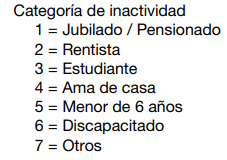

In [447]:
#Con toda esta información vuelvo a definir a mi df para las personas laboralmente activas (incluidas las personas desempleadas)
df = df_filtered1[df_filtered1['ESTADO LABORAL'] != 3].copy()
df.count()

MAS_500                    21658
AGLOMERADO                 21658
SEXO                       21658
AÑOS                       21658
ESTADO CIVIL               21658
COBERTURA MÉDICA           21658
LUGAR DE NACIMIENTO        21658
NIVEL_ED                   21658
ESTADO LABORAL             21658
CAT_OCUP                   21658
CAT_INAC                   21658
CANT. DE OCUPACIONES       20242
PP3E_TOT                   20242
PP3F_TOT                   20242
MÁS TRABAJO?               20242
RUBRO EMPRESA              20242
ANTIGÜEDAD                 20242
SUELDO INDIVIDUAL          20242
TIEMPO BUSCANDO EMPLEO      1341
INGRESO TOTAL FAMILIAR     21658
HS_TRABAJADAS_SEMANALES    20242
dtype: int64

In [448]:
# Cuento vacíos Cant. de Ocupaciones para comprobar valores
df['CANT. DE OCUPACIONES'].isnull().value_counts()

CANT. DE OCUPACIONES
False    20242
True      1416
Name: count, dtype: int64

In [449]:
# Quienes son? 
df.loc[df['CANT. DE OCUPACIONES'].isnull() == True]

,MAS_500,AGLOMERADO,SEXO,AÑOS,ESTADO CIVIL,COBERTURA MÉDICA,LUGAR DE NACIMIENTO,NIVEL_ED,ESTADO LABORAL,CAT_OCUP,...,CANT. DE OCUPACIONES,PP3E_TOT,PP3F_TOT,MÁS TRABAJO?,RUBRO EMPRESA,ANTIGÜEDAD,SUELDO INDIVIDUAL,TIEMPO BUSCANDO EMPLEO,INGRESO TOTAL FAMILIAR,HS_TRABAJADAS_SEMANALES
61,N,19,2,23,5,4,1,5,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,600000,NaN
111,S,4,2,43,2,1,1,2,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,350000,NaN
210,N,20,1,43,5,4,3,5,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1200000,NaN
334,S,13,1,49,3,4,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,60000,NaN
399,S,33,2,49,2,4,4,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46006,S,29,2,29,1,4,1,4,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,140000,NaN
46042,S,33,1,63,2,1,1,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,NaN
46046,S,33,1,21,5,1,1,3,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
46047,S,33,1,20,5,1,1,3,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


--> Reemplazo los NaN por 0 para no dejarlos afuera

¿Por qué los reemplazo por 0 en vez de quitarlos con un *'dropna'*?

- Si los quito, perdería informacion sobre, por ejemplo, los desempleados, ya que tienen 0 cantidad de ocupaciones. Según el diseño de la encuesta, sólamente las personas con ocupaciones debían responder a este apartado: https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_registro_1T2024.pdf


Algo similar sucede con 'MÁS TRABAJO?', 'RUBRO EMPRESA', 'ANTIGÜEDAD', 'SUELDO INDIVIDUAL', 'HS TRABAJADAS SEMANALES'.
De forma opuesta, sucede con 'TIEMPO BUSCANDO EMPLEO', ya que este apartado es para personas desempleadas. 

In [450]:
# Reemplazo con 0 a los valores vacíos 
df['CANT. DE OCUPACIONES'] = df['CANT. DE OCUPACIONES'].fillna(0)
df['MÁS TRABAJO?'] = df['MÁS TRABAJO?'].fillna(0)
df['RUBRO EMPRESA'] = df['RUBRO EMPRESA'].fillna(0)
df['ANTIGÜEDAD'] = df['ANTIGÜEDAD'].fillna(0)
df['SUELDO INDIVIDUAL'] = df['SUELDO INDIVIDUAL'].fillna(0)
df['HS_TRABAJADAS_SEMANALES'] = df['HS_TRABAJADAS_SEMANALES'].fillna(0)
df['TIEMPO BUSCANDO EMPLEO'] = df['TIEMPO BUSCANDO EMPLEO'].fillna(0)

df.count()


MAS_500                    21658
AGLOMERADO                 21658
SEXO                       21658
AÑOS                       21658
ESTADO CIVIL               21658
COBERTURA MÉDICA           21658
LUGAR DE NACIMIENTO        21658
NIVEL_ED                   21658
ESTADO LABORAL             21658
CAT_OCUP                   21658
CAT_INAC                   21658
CANT. DE OCUPACIONES       21658
PP3E_TOT                   20242
PP3F_TOT                   20242
MÁS TRABAJO?               21658
RUBRO EMPRESA              21658
ANTIGÜEDAD                 21658
SUELDO INDIVIDUAL          21658
TIEMPO BUSCANDO EMPLEO     21658
INGRESO TOTAL FAMILIAR     21658
HS_TRABAJADAS_SEMANALES    21658
dtype: int64

In [451]:
df.head()

,MAS_500,AGLOMERADO,SEXO,AÑOS,ESTADO CIVIL,COBERTURA MÉDICA,LUGAR DE NACIMIENTO,NIVEL_ED,ESTADO LABORAL,CAT_OCUP,...,CANT. DE OCUPACIONES,PP3E_TOT,PP3F_TOT,MÁS TRABAJO?,RUBRO EMPRESA,ANTIGÜEDAD,SUELDO INDIVIDUAL,TIEMPO BUSCANDO EMPLEO,INGRESO TOTAL FAMILIAR,HS_TRABAJADAS_SEMANALES
0,S,10,2,44,5,1,1,3,1,3,...,0.0,30.0,0.0,2.0,4000.0,0.0,-9.0,0.0,0,30.0
3,S,10,1,54,2,1,1,4,1,3,...,0.0,40.0,0.0,2.0,2500.0,0.0,250000.0,0.0,850000,40.0
4,S,10,2,53,2,4,1,4,1,3,...,0.0,20.0,0.0,2.0,4804.0,0.0,200000.0,0.0,850000,20.0
5,S,10,2,26,5,4,1,6,1,3,...,0.0,40.0,0.0,2.0,5601.0,0.0,200000.0,0.0,850000,40.0
6,S,10,1,25,5,4,1,5,1,3,...,0.0,48.0,0.0,2.0,3100.0,0.0,200000.0,0.0,850000,48.0


## 3. Análisis del DataFrame: Detección de Outliers

Debo identificar los Outliers para:
- (A) SUELDO INDIVIDUAL

In [452]:
#SUELDO INDIVIDUAL
df['SUELDO INDIVIDUAL'].describe()

count    2.165800e+04
mean     1.853475e+05
std      2.709924e+05
min     -9.000000e+00
25%      0.000000e+00
50%      9.600000e+04
75%      3.000000e+05
max      1.000000e+07
Name: SUELDO INDIVIDUAL, dtype: float64

<Axes: xlabel='SUELDO INDIVIDUAL', ylabel='Probability'>

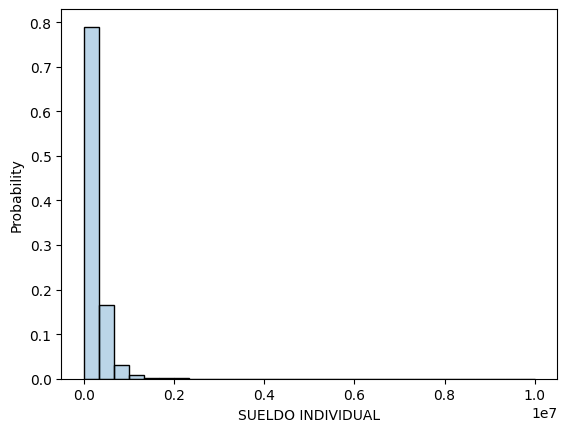

In [453]:
plt.figure()
sns.histplot(data = df,
             x = 'SUELDO INDIVIDUAL',
             bins = 30,            
             alpha = 0.3,
             kde = False,
             stat='probability')

In [454]:
# Método: IQR 
primer_cuartil_si = df['SUELDO INDIVIDUAL'].quantile(0.25)
tercer_cuartil_si = df['SUELDO INDIVIDUAL'].quantile(0.75)

rango_intercuartilico_si = tercer_cuartil_si - primer_cuartil_si

# Limites: 
limite_inf_si = primer_cuartil_si - (2 * rango_intercuartilico_si)
limite_sup_si = tercer_cuartil_si + (2 * rango_intercuartilico_si)

print(limite_inf_si,limite_sup_si)

-600000.0 900000.0


In [455]:
print(primer_cuartil_si,tercer_cuartil_si,rango_intercuartilico_si)

0.0 300000.0 300000.0


In [456]:
# Identifico outliers: 
df['Outlier_IQR_SI'] = np.where((df['SUELDO INDIVIDUAL'] < limite_inf_si) | (df['SUELDO INDIVIDUAL'] > limite_sup_si),1,0)
df['Outlier_IQR_SI'].value_counts()

Outlier_IQR_SI
0    21328
1      330
Name: count, dtype: int64

Text(0.5, 1.0, 'Detección Outliers SUELDO INDIVIDUAL - Metodo IQR')

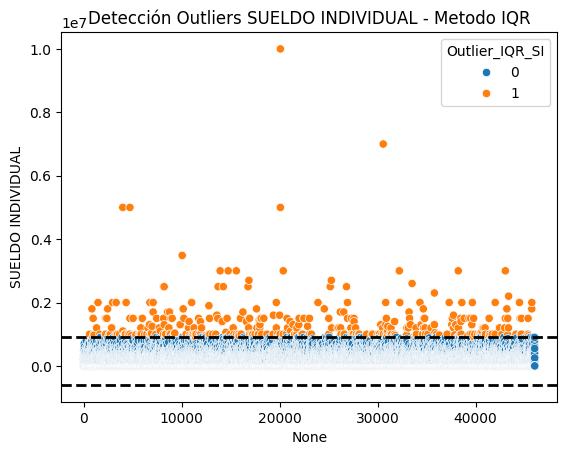

In [457]:
# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = df.index,
                y = 'SUELDO INDIVIDUAL',
               hue = 'Outlier_IQR_SI')
plt.axhline(y = limite_inf_si, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup_si, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers SUELDO INDIVIDUAL - Metodo IQR')

In [458]:
#Reemplazo los outliers por la media, ya que no quiero eliminar estas filas:
#Busco la media sin outliers
media_SI = df.loc[df['Outlier_IQR_SI'] == 0, 'SUELDO INDIVIDUAL'].mean()
df['SUELDO INDIVIDUAL'] = np.where(df['Outlier_IQR_SI'] == 1, media_SI, df['SUELDO INDIVIDUAL'])

In [459]:
#Corroboro:
df['Outlier_IQR_SI'] = np.where((df['SUELDO INDIVIDUAL'] < limite_inf_si) | (df['SUELDO INDIVIDUAL'] > limite_sup_si),1,0)
df['Outlier_IQR_SI'].value_counts()

Outlier_IQR_SI
0    21658
Name: count, dtype: int64

- (B) TIEMPO BUSCANDO EMPLEO

In [460]:
#TIEMPO BUSCANDO EMPLEO
df['TIEMPO BUSCANDO EMPLEO'].describe()

count    21658.000000
mean         0.189676
std          0.822660
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: TIEMPO BUSCANDO EMPLEO, dtype: float64

<Axes: xlabel='TIEMPO BUSCANDO EMPLEO', ylabel='Probability'>

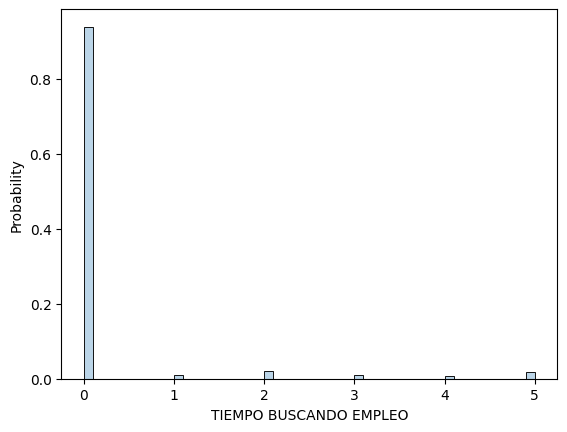

In [461]:
plt.figure()
sns.histplot(data = df,
             x = 'TIEMPO BUSCANDO EMPLEO',
             bins = 50,            
             alpha = 0.3,
             kde = False,
             stat='probability')

In [464]:
# Método: IQR 
primer_cuartil_tbe = df['TIEMPO BUSCANDO EMPLEO'].quantile(0.25)
tercer_cuartil_tbe = df['TIEMPO BUSCANDO EMPLEO'].quantile(0.75)

rango_intercuartilico_tbe = tercer_cuartil_tbe - primer_cuartil_tbe

# Limites: 
limite_inf_tbe = primer_cuartil_tbe - (2 * rango_intercuartilico_tbe)
limite_sup_tbe = tercer_cuartil_tbe + (2 * rango_intercuartilico_tbe)

print(limite_inf_tbe,limite_sup_tbe)

0.0 0.0


In [465]:
print(primer_cuartil_tbe,tercer_cuartil_tbe,rango_intercuartilico_tbe)

0.0 0.0 0.0


'TIEMPO BUSCANDO EMPLEO' no contiene outliers

- (C) INGRESO TOTAL FAMILIAR

Intento esta vez con Z score para probar otro tipo de identificación de outliers

In [466]:
#INGRESO TOTAL FAMILIAR
df['INGRESO TOTAL FAMILIAR'].describe()

count    2.165800e+04
mean     5.310906e+05
std      7.683114e+05
min      0.000000e+00
25%      0.000000e+00
50%      4.122500e+05
75%      7.492160e+05
max      3.393700e+07
Name: INGRESO TOTAL FAMILIAR, dtype: float64

<Axes: xlabel='INGRESO TOTAL FAMILIAR', ylabel='Probability'>

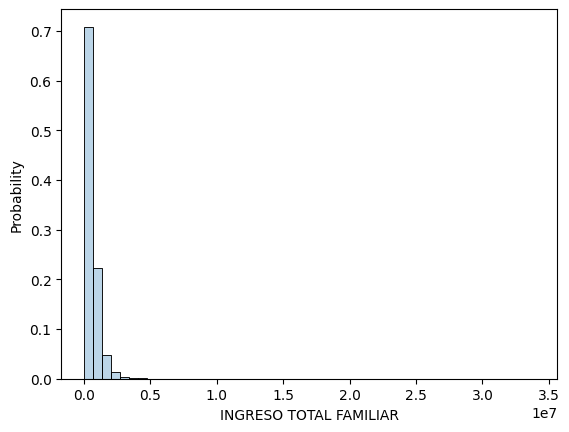

In [467]:
plt.figure()
sns.histplot(data = df,
             x = 'INGRESO TOTAL FAMILIAR',
             bins = 50,            
             alpha = 0.3,
             kde = False,
             stat='probability')

In [468]:
media = df['INGRESO TOTAL FAMILIAR'].mean()
desvio = df['INGRESO TOTAL FAMILIAR'].std()
valores_z = (df['INGRESO TOTAL FAMILIAR'] - media)/desvio

# Limites: 
limite_inf_itf = (-3)
limite_sup_itf = 3

print(valores_z)

0       -0.691244
3        0.415078
4        0.415078
5        0.415078
6        0.415078
           ...   
46044   -0.691244
46045   -0.691244
46046   -0.691244
46047   -0.691244
46049   -0.691244
Name: INGRESO TOTAL FAMILIAR, Length: 21658, dtype: float64


In [469]:
# Identifico outliers: 
df['Outlier_ZScore'] = np.where((valores_z < limite_inf_itf) | (valores_z > limite_sup_itf),1,0)
df['Outlier_ZScore'].value_counts()

Outlier_ZScore
0    21499
1      159
Name: count, dtype: int64

Text(0.5, 1.0, 'Detección Outliers INGRESO TOTAL FAMILIAR - Metodo Z Score')

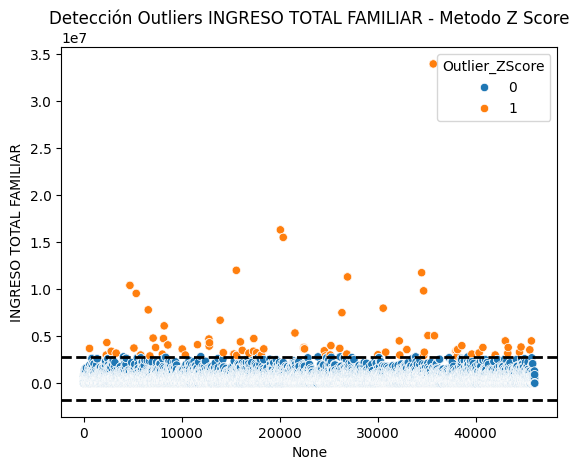

In [470]:
limite_inf_tr = limite_inf_itf * desvio + media
limite_sup_tr = limite_sup_itf * desvio + media

# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = df.index,
                y = 'INGRESO TOTAL FAMILIAR',
               hue = 'Outlier_ZScore')
plt.axhline(y = limite_inf_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers INGRESO TOTAL FAMILIAR - Metodo Z Score')

In [471]:
#Reemplazo los outliers por la media, ya que no quiero eliminar estas filas:
#Busco la media sin outliers
media_itf = df.loc[df['Outlier_ZScore'] == 0, 'INGRESO TOTAL FAMILIAR'].mean()
df['INGRESO TOTAL FAMILIAR'] = np.where(df['Outlier_ZScore'] == 1, media_itf, df['INGRESO TOTAL FAMILIAR'])

Text(0.5, 1.0, 'Corroboración del reemplazo de Outliers por la media para INGRESO TOTAL FAMILIAR - Metodo Z Score')

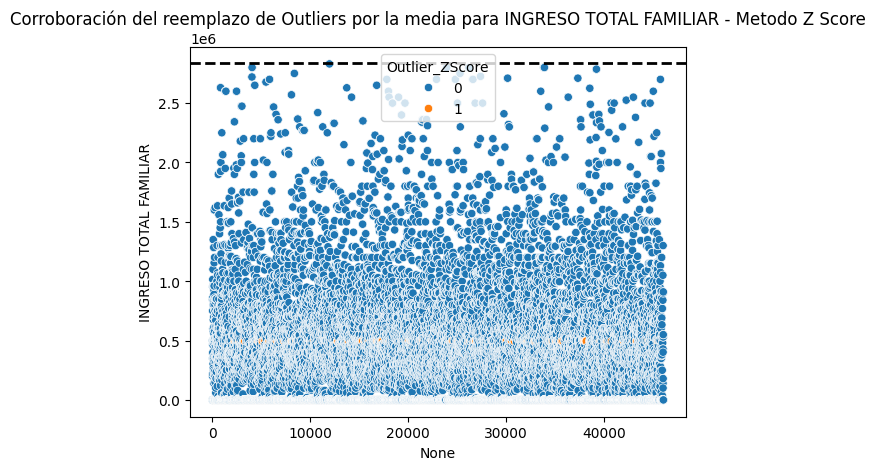

In [472]:
#Corroboro gráficamente:

limite_inf_tr = limite_inf_itf * desvio + media
limite_sup_tr = limite_sup_itf * desvio + media

# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = df.index,
                y = 'INGRESO TOTAL FAMILIAR',
               hue = 'Outlier_ZScore')
plt.axhline(y = limite_sup_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Corroboración del reemplazo de Outliers por la media para INGRESO TOTAL FAMILIAR - Metodo Z Score')

- (D) ANTIGÜEDAD

In [473]:
#ANTIGÜEDAD
df['ANTIGÜEDAD'].describe()

count    21658.000000
mean         0.302660
std          2.339586
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         99.000000
Name: ANTIGÜEDAD, dtype: float64

<Axes: xlabel='ANTIGÜEDAD', ylabel='Probability'>

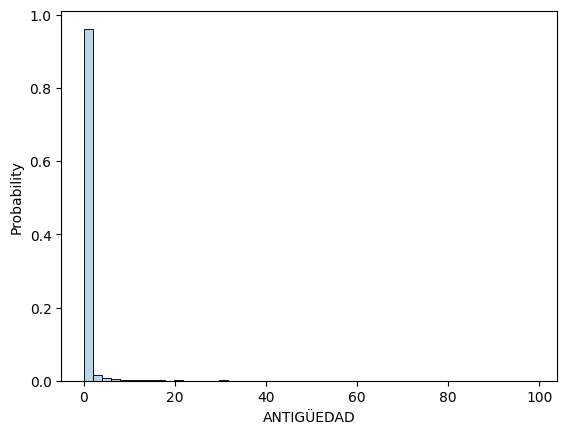

In [474]:
plt.figure()
sns.histplot(data = df,
             x = 'ANTIGÜEDAD',
             bins = 50,            
             alpha = 0.3,
             kde = False,
             stat='probability')

In [475]:
media_ant = df['ANTIGÜEDAD'].mean()
desvio_ant = df['ANTIGÜEDAD'].std()
valores_z_ant = (df['ANTIGÜEDAD'] - media)/desvio

# Limites: 
limite_inf_ant = (-3)
limite_sup_ant = 3

print(valores_z_ant)

0       -0.691244
3       -0.691244
4       -0.691244
5       -0.691244
6       -0.691244
           ...   
46044   -0.691244
46045   -0.691244
46046   -0.691244
46047   -0.691244
46049   -0.691244
Name: ANTIGÜEDAD, Length: 21658, dtype: float64


In [476]:
# Identifico outliers: 
df['Outlier_ZScore_ant'] = np.where((valores_z_ant < limite_inf_ant) | (valores_z_ant > limite_sup_ant),1,0)
df['Outlier_ZScore_ant'].value_counts()

Outlier_ZScore_ant
0    21658
Name: count, dtype: int64

Si bien en principio parecería no haber outliers, veo que al describir la variable obtengo un máximo de 99 años. Esto es en principio imposible, ya que la antigüedad en el último trabajo de una persona no puede ser de 99 años. A su vez, al ver los detalles del dataset disponible en https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_registro_1T2024.pdf se menciona que el 99 representa el "No sabe/No responde" para esta categoría. Es por ello que a todos los campos que en esta categoría tengan 99, se los tratará como outliers. 

In [477]:
#Media teniendo en cuenta las filas con valores igual a 99:
media_ant

0.30265952534860097

In [478]:
#Busco la media de antigüedad SIN tener en cuenta los valores 99
media_ant_sin99 = df.loc[df['ANTIGÜEDAD'] != 99, 'ANTIGÜEDAD'].mean()
media_ant_sin99

0.28442781934053757

In [479]:
#Reemplazo por la media
df['ANTIGÜEDAD'] = np.where(df['ANTIGÜEDAD'] == 99, media_ant_sin99, df['ANTIGÜEDAD'])

<Axes: xlabel='ANTIGÜEDAD', ylabel='Probability'>

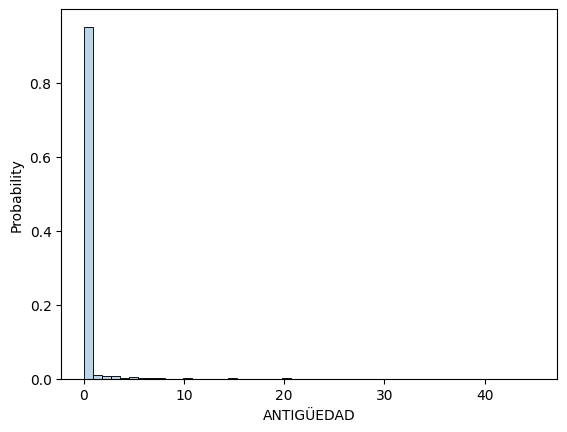

In [480]:
#Corroboro:
plt.figure()
sns.histplot(data = df,
             x = 'ANTIGÜEDAD',
             bins = 50,            
             alpha = 0.3,
             kde = False,
             stat='probability')

- (E) HS TRABAJADAS SEMANALES

In [481]:
#HS TRABAJADAS SEMANALES
df['HS_TRABAJADAS_SEMANALES'].describe()

count    21658.000000
mean        34.132884
std         43.048101
min          0.000000
25%         20.000000
50%         36.000000
75%         48.000000
max       1998.000000
Name: HS_TRABAJADAS_SEMANALES, dtype: float64

<Axes: xlabel='HS_TRABAJADAS_SEMANALES', ylabel='Probability'>

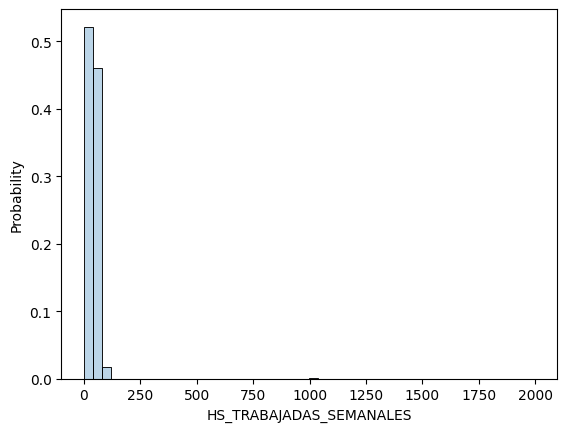

In [482]:
plt.figure()
sns.histplot(data = df,
             x = 'HS_TRABAJADAS_SEMANALES',
             bins = 50,            
             alpha = 0.3,
             kde = False,
             stat='probability')

In [483]:
# Método: IQR 
primer_cuartil_hts = df['HS_TRABAJADAS_SEMANALES'].quantile(0.25)
tercer_cuartil_hts = df['HS_TRABAJADAS_SEMANALES'].quantile(0.75)

rango_intercuartilico_hts = tercer_cuartil_hts - primer_cuartil_hts

# Limites: 
limite_inf_hts = primer_cuartil_hts - (2 * rango_intercuartilico_hts)
limite_sup_hts = tercer_cuartil_hts + (2 * rango_intercuartilico_hts)

print(limite_inf_hts,limite_sup_hts)

-36.0 104.0


In [484]:
print(primer_cuartil_hts,tercer_cuartil_hts,rango_intercuartilico_hts)

20.0 48.0 28.0


In [485]:
# Identifico outliers: 
df['Outlier_IQR_hts'] = np.where((df['HS_TRABAJADAS_SEMANALES'] < limite_inf_hts) | (df['HS_TRABAJADAS_SEMANALES'] > limite_sup_hts),1,0)
df['Outlier_IQR_hts'].value_counts()

Outlier_IQR_hts
0    21591
1       67
Name: count, dtype: int64

Text(0.5, 1.0, 'Detección Outliers HS_TRABAJADAS_SEMANALES - Metodo IQR')

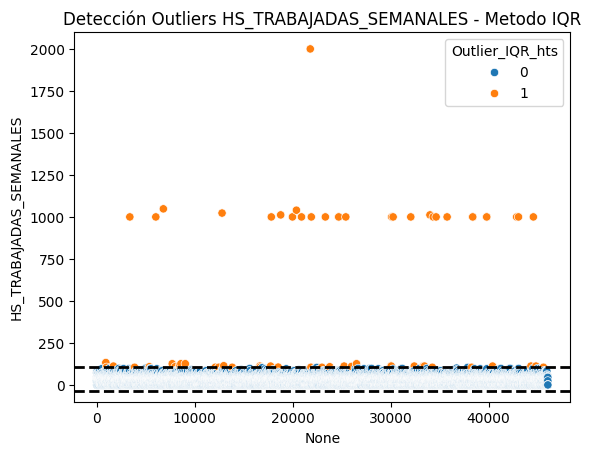

In [486]:
# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = df.index,
                y = 'HS_TRABAJADAS_SEMANALES',
               hue = 'Outlier_IQR_hts')
plt.axhline(y = limite_inf_hts, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup_hts, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers HS_TRABAJADAS_SEMANALES - Metodo IQR')

In [487]:
#Reemplazo los outliers por la media, ya que no quiero eliminar estas filas:
#Busco la media sin outliers
media_hts = df.loc[df['Outlier_IQR_hts'] == 0, 'HS_TRABAJADAS_SEMANALES'].mean()
df['HS_TRABAJADAS_SEMANALES'] = np.where(df['Outlier_IQR_hts'] == 1, media_hts, df['HS_TRABAJADAS_SEMANALES'])

In [488]:
#Corroboro:
df['Outlier_IQR_hts'] = np.where((df['HS_TRABAJADAS_SEMANALES'] < limite_inf_hts) | (df['HS_TRABAJADAS_SEMANALES'] > limite_sup_hts),1,0)
df['Outlier_IQR_hts'].value_counts()

Outlier_IQR_hts
0    21658
Name: count, dtype: int64

## 4. Análisis del DataFrame: Correlación entre variables

In [489]:
# Matriz de correlacion
matriz_correlacion = df[['NIVEL_ED','ESTADO LABORAL','AÑOS','SUELDO INDIVIDUAL','INGRESO TOTAL FAMILIAR', 'HS_TRABAJADAS_SEMANALES']].corr(method='pearson').round(3)
matriz_correlacion

,NIVEL_ED,ESTADO LABORAL,AÑOS,SUELDO INDIVIDUAL,INGRESO TOTAL FAMILIAR,HS_TRABAJADAS_SEMANALES
NIVEL_ED,1.000,-0.044,-0.066,0.174,0.159,-0.029
ESTADO LABORAL,-0.044,1.000,-0.131,-0.195,-0.071,-0.381
AÑOS,-0.066,-0.131,1.000,0.018,-0.012,0.017
SUELDO INDIVIDUAL,0.174,-0.195,0.018,1.000,0.447,0.160
INGRESO TOTAL FAMILIAR,0.159,-0.071,-0.012,0.447,1.000,0.073
HS_TRABAJADAS_SEMANALES,-0.029,-0.381,0.017,0.160,0.073,1.000


Significados:
- Correlación mayor a cero: Si la correlación es igual a +1 significa que es positiva perfecta. En este caso significa que la correlación es positiva, es decir, que las variables se correlacionan directamente.
- Correlación menor a cero: Si la correlación es menor a cero, significa que es negativa, es decir, que las variables se relacionan inversamente.
Si el coeficiente es igual a -1, nos referimos a una correlación negativa perfecta.

In [490]:
# Selecciono a la variable NIVEL_ED para estudiar únicamente correlación con ella 
matriz_correlacion_nivel_ed = matriz_correlacion['NIVEL_ED']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido ya que se ha estudiado su relacion anteriormente
matriz_correlacion_nivel_ed = abs(matriz_correlacion_nivel_ed)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['NIVEL_ED']
# Las excluyo del análisis
matriz_correlacion_nivel_ed = matriz_correlacion_nivel_ed.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_nivel_ed = matriz_correlacion_nivel_ed.sort_values(ascending=False)

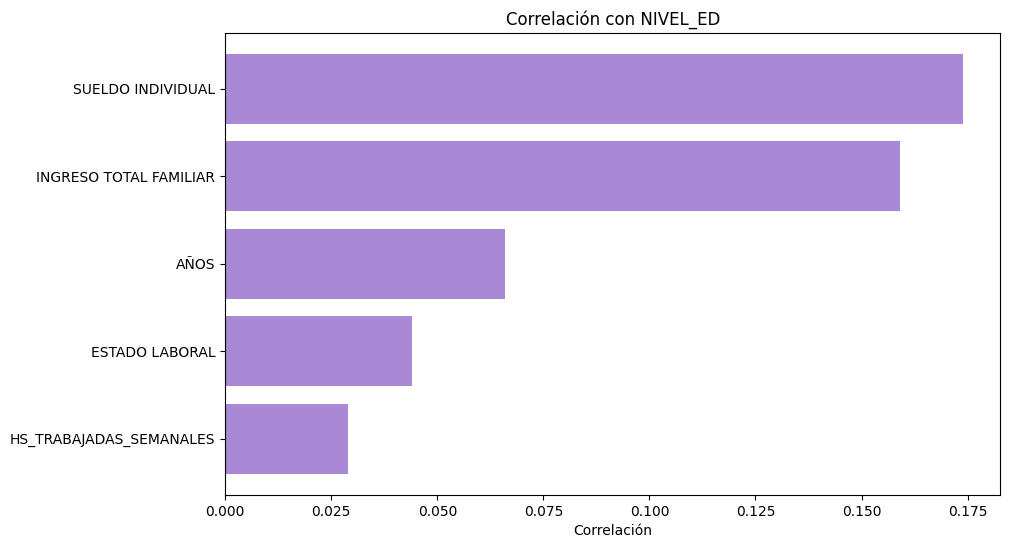

In [491]:
# Grafico las variables y su correlación con NIVEL_ED
matriz_correlacion_nivel_ed_graficar = matriz_correlacion_nivel_ed[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_nivel_ed_graficar.index, 
         matriz_correlacion_nivel_ed_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con NIVEL_ED')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

Significado:

Si bien las correlaciones no son extremadamente fuertes (ninguna está muy cerca del 1), puede observar una débil correlación entre el Nivel de Estudios y el Sueldo Individual de una persona. A más alto el nivel de estudios, más alto el sueldo. 

Por el contrario es interesante analizar el tema de las horas semanales trabajadas. A mayor nivel educativo, menos son las horas que una persona suele trabajar. Teniendo en cuenta lo analizado en el apartado anterior es interesante el siguiente dato:

- *El 25% de la muestra trabajó más de 48 horas por semana*. Es decir, 1 de cada 4 persona, ha trabajado 6 días por semana con una jornada aproximada de 8 horas o lo que también podría significar casi 10 horas por día por semana. 

## 5. Análisis univariado/bivariado/multivariado

In [492]:
# Para grafircar la Cantidad de personas encuestadas por tipo de aglomerado y nivel educativo
df_500 = df[['MAS_500','NIVEL_ED']].groupby(by=['NIVEL_ED','MAS_500']).size().reset_index(name='Cantidad por tipo de aglomerado')
df_500.head()

,NIVEL_ED,MAS_500,Cantidad por tipo de aglomerado
0,1,N,310
1,1,S,281
2,2,N,1214
3,2,S,1108
4,3,N,1878


C:\Users\Maite\AppData\Local\Temp\ipykernel_10940\3746636035.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#A989D6'` for the same effect.

  sns.barplot(x = 'NIVEL_ED', y = 'Cantidad por tipo de aglomerado', hue='MAS_500', data = df_500,color = '#A989D6')
C:\Users\Maite\AppData\Local\Temp\ipykernel_10940\3746636035.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nuevas_etiquetas_x)


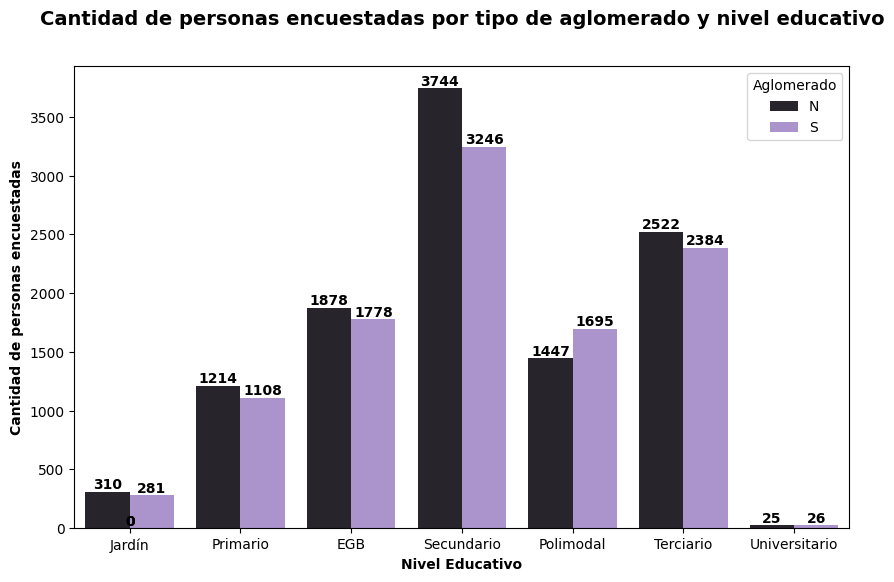

In [493]:
#Gráfico Cantidad de personas encuestadas por tipo de aglomerado y nivel educativo
plt.figure(figsize=(10,6))
sns.barplot(x = 'NIVEL_ED', y = 'Cantidad por tipo de aglomerado', hue='MAS_500', data = df_500,color = '#A989D6')
plt.title("Cantidad de personas encuestadas por tipo de aglomerado y nivel educativo",
            fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Nivel Educativo', fontweight = 'bold')
nuevas_etiquetas_x = ["Jardín", "Primario", "EGB", "Secundario", "Polimodal", "Terciario", "Universitario", "Posgrado", "Educación especial"]
ax = plt.gca()
ax.set_xticklabels(nuevas_etiquetas_x)
plt.ylabel('Cantidad de personas encuestadas', fontweight = 'bold')
nuevas_etiquetas_legend = ["Aglomerado con menos de 500 mil habitantes","Aglomerado con mas de 500 mil habitantes"]
plt.legend(title = 'Aglomerado')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{int(y_text)}', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

In [494]:
df_aglomerado = df[['AGLOMERADO']].groupby(by=['AGLOMERADO']).size().reset_index(name='Cantidad por aglomerado')
df_aglomerado = df_aglomerado.sort_values(by='Cantidad por aglomerado', ascending=False)
top_8 = df_aglomerado.head(8) #como son muchos aglomerados, solo elijo los primeros 8
valores = top_8['Cantidad por aglomerado']
etiquetas = top_8['AGLOMERADO']
df_aglomerado.head()

,AGLOMERADO,Cantidad por aglomerado
26,33,2729
10,13,1095
22,29,976
18,23,916
8,10,898


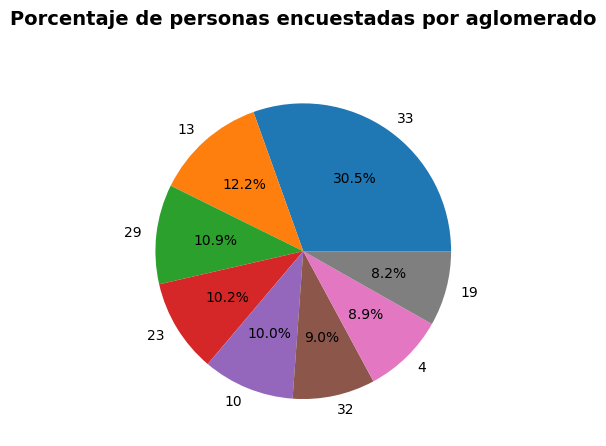

In [495]:
colors = sns.color_palette("pastel")
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%') # Para mostrar el porcentaje de cada sector en el gráfico
plt.title("Porcentaje de personas encuestadas por aglomerado",
            fontsize = 14, fontweight = 'bold', pad = 30)
plt.show()

In [496]:
df_sexo = df[['SEXO','NIVEL_ED']].groupby(by=['NIVEL_ED','SEXO']).size().reset_index(name='Cantidad por sexo')
df_sexo.head()

,NIVEL_ED,SEXO,Cantidad por sexo
0,1,1,409
1,1,2,182
2,2,1,1527
3,2,2,795
4,3,1,2411


C:\Users\Maite\AppData\Local\Temp\ipykernel_10940\1156769447.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nuevas_etiquetas_x)


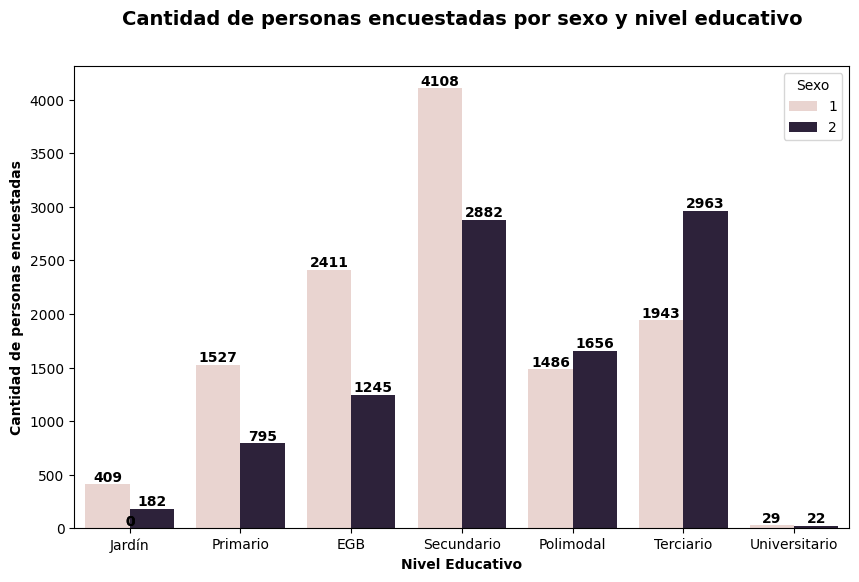

In [497]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'NIVEL_ED', y = 'Cantidad por sexo', hue='SEXO', data = df_sexo)
plt.title("Cantidad de personas encuestadas por sexo y nivel educativo",
            fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Nivel Educativo', fontweight = 'bold')
nuevas_etiquetas_x = ["Jardín", "Primario", "EGB", "Secundario", "Polimodal", "Terciario", "Universitario", "Posgrado", "Educación especial"]
ax = plt.gca()
ax.set_xticklabels(nuevas_etiquetas_x)
plt.ylabel('Cantidad de personas encuestadas', fontweight = 'bold')
plt.legend(title = 'Sexo')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{int(y_text)}', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

In [498]:
df_estado_laboral = df[['ESTADO LABORAL','NIVEL_ED']].groupby(by=['NIVEL_ED','ESTADO LABORAL']).size().reset_index(name='Cantidad por ESTADO LABORAL')
df_estado_laboral.head()

,NIVEL_ED,ESTADO LABORAL,Cantidad por ESTADO LABORAL
0,1,0,1
1,1,1,549
2,1,2,41
3,2,0,12
4,2,1,2190


C:\Users\Maite\AppData\Local\Temp\ipykernel_10940\3670748175.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nuevas_etiquetas_x)


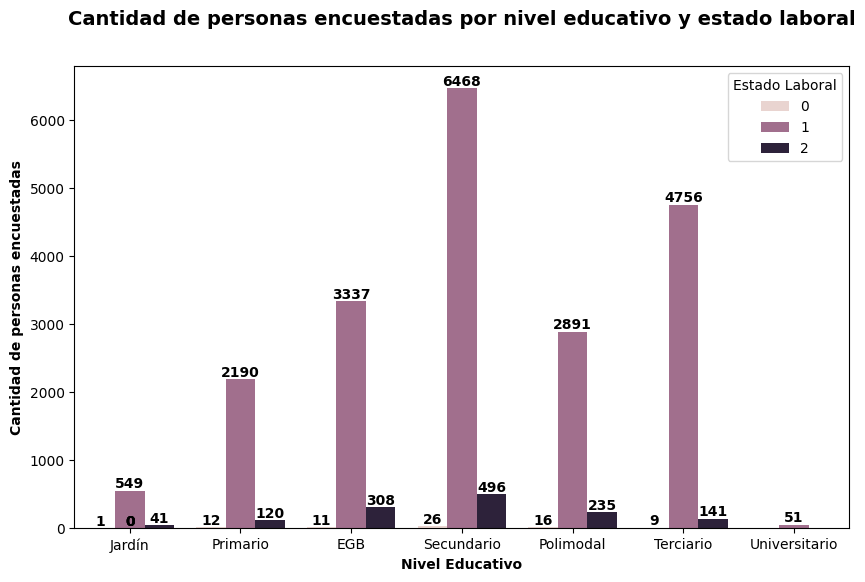

In [499]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'NIVEL_ED', y = 'Cantidad por ESTADO LABORAL', hue='ESTADO LABORAL', data = df_estado_laboral)
plt.title("Cantidad de personas encuestadas por nivel educativo y estado laboral",
            fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Nivel Educativo', fontweight = 'bold')
nuevas_etiquetas_x = ["Jardín", "Primario", "EGB", "Secundario", "Polimodal", "Terciario", "Universitario", "Posgrado", "Educación especial"]
ax = plt.gca()
ax.set_xticklabels(nuevas_etiquetas_x)
plt.ylabel('Cantidad de personas encuestadas', fontweight = 'bold')
plt.legend(title = 'Estado Laboral')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{int(y_text)}', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

In [500]:
df_desempleo = df[df['TIEMPO BUSCANDO EMPLEO'] != 0] #solo me interesa saber la gente que esta desempleada, por lo que, si tiene 0 tiempo buscando trabajo es porque no lo esta
df_desempleo = df_desempleo[['TIEMPO BUSCANDO EMPLEO','NIVEL_ED']].groupby(by=['TIEMPO BUSCANDO EMPLEO','NIVEL_ED']).size().reset_index(name='Cantidad por TIEMPO BUSCANDO EMPLEO')
df_desempleo.head()

,TIEMPO BUSCANDO EMPLEO,NIVEL_ED,Cantidad por TIEMPO BUSCANDO EMPLEO
0,1.0,1,8
1,1.0,2,18
2,1.0,3,54
3,1.0,4,74
4,1.0,5,30


C:\Users\Maite\AppData\Local\Temp\ipykernel_10940\3628086389.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nuevas_etiquetas_x)


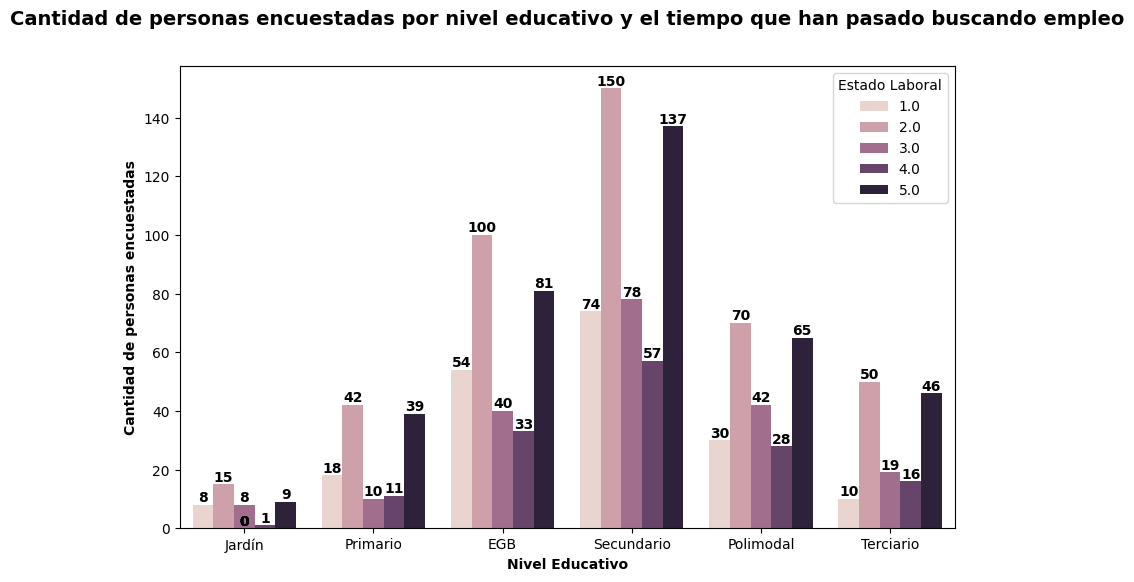

In [501]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'NIVEL_ED', y = 'Cantidad por TIEMPO BUSCANDO EMPLEO', hue='TIEMPO BUSCANDO EMPLEO', data = df_desempleo)
plt.title("Cantidad de personas encuestadas por nivel educativo y el tiempo que han pasado buscando empleo",
            fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Nivel Educativo', fontweight = 'bold')
nuevas_etiquetas_x = ["Jardín", "Primario", "EGB", "Secundario", "Polimodal", "Terciario", "Universitario", "Posgrado", "Educación especial"]
ax = plt.gca()
ax.set_xticklabels(nuevas_etiquetas_x)
plt.ylabel('Cantidad de personas encuestadas', fontweight = 'bold')
plt.legend(title = 'Estado Laboral')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{int(y_text)}', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

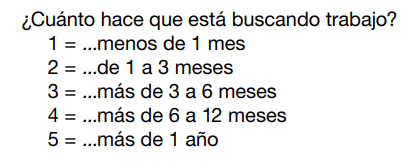

In [502]:
df_ocupaciones = df[(df['CANT. DE OCUPACIONES']!= 0) & (df['CANT. DE OCUPACIONES'] != 9)] #me interesa la gente que tiene una ocupacion o mas, no me interesa la gente que actualmente esta desempleada o no esta trabajando (0), ni los outliers (9)
df_ocupaciones = df_ocupaciones[['CANT. DE OCUPACIONES','NIVEL_ED']].groupby(by=['CANT. DE OCUPACIONES','NIVEL_ED']).size().reset_index(name='Cantidad por CANTIDAD DE OCUPACIONES')
df_ocupaciones.head()

,CANT. DE OCUPACIONES,NIVEL_ED,Cantidad por CANTIDAD DE OCUPACIONES
0,2.0,1,36
1,2.0,2,126
2,2.0,3,226
3,2.0,4,296
4,2.0,5,238


C:\Users\Maite\AppData\Local\Temp\ipykernel_10940\3097259880.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nuevas_etiquetas_x)


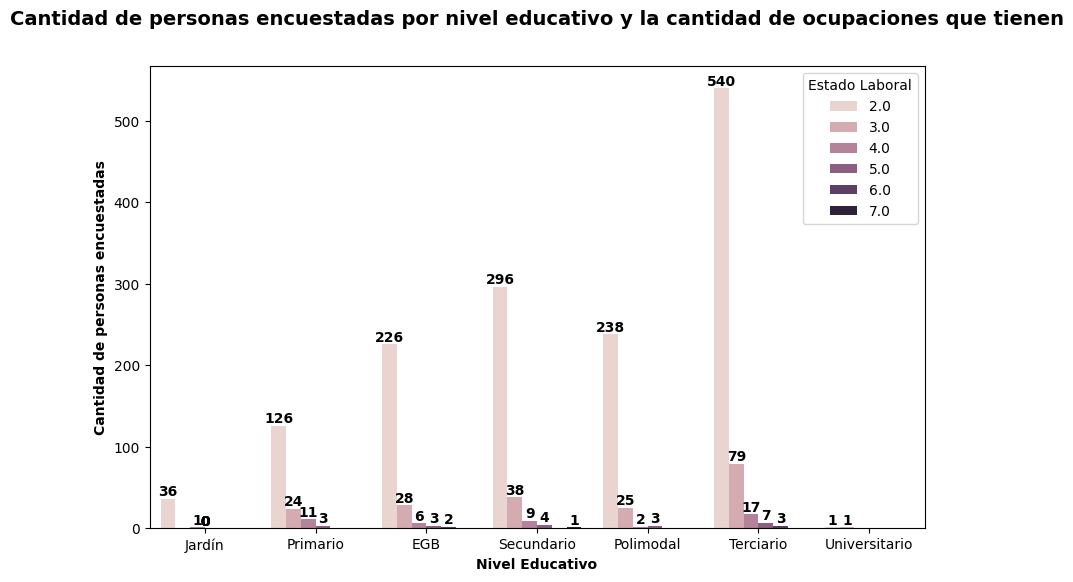

In [503]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'NIVEL_ED', y = 'Cantidad por CANTIDAD DE OCUPACIONES', hue='CANT. DE OCUPACIONES', data = df_ocupaciones)
plt.title("Cantidad de personas encuestadas por nivel educativo y la cantidad de ocupaciones que tienen",
            fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Nivel Educativo', fontweight = 'bold')
nuevas_etiquetas_x = ["Jardín", "Primario", "EGB", "Secundario", "Polimodal", "Terciario", "Universitario", "Posgrado", "Educación especial"]
ax = plt.gca()
ax.set_xticklabels(nuevas_etiquetas_x)
plt.ylabel('Cantidad de personas encuestadas', fontweight = 'bold')
plt.legend(title = 'Estado Laboral')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{int(y_text)}', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

In [504]:
df_mas_trabajo = df[(df['MÁS TRABAJO?']!= 0) & (df['MÁS TRABAJO?']!= 9)] #me interesa la gente que ya esta trabajando sin utliers (9)
df_mas_trabajo = df_mas_trabajo[['MÁS TRABAJO?','NIVEL_ED']].groupby(by=['MÁS TRABAJO?','NIVEL_ED']).size().reset_index(name='Cantidad por MÁS TRABAJO?')
df_mas_trabajo.head(20)

,MÁS TRABAJO?,NIVEL_ED,Cantidad por MÁS TRABAJO?
0,1.0,1,123
1,1.0,2,429
2,1.0,3,740
3,1.0,4,965
4,1.0,5,499
5,1.0,6,512
6,1.0,7,13
7,2.0,1,426
8,2.0,2,1761
9,2.0,3,2597


C:\Users\Maite\AppData\Local\Temp\ipykernel_10940\2910553182.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nuevas_etiquetas_x)


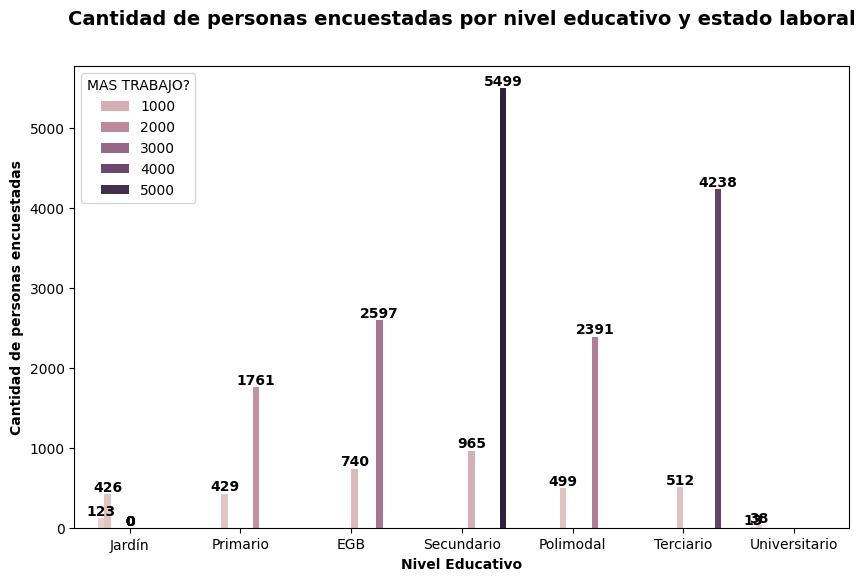

In [505]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'NIVEL_ED', y = 'Cantidad por MÁS TRABAJO?', hue='Cantidad por MÁS TRABAJO?', data = df_mas_trabajo)
plt.title("Cantidad de personas encuestadas por nivel educativo y estado laboral",
            fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Nivel Educativo', fontweight = 'bold')
nuevas_etiquetas_x = ["Jardín", "Primario", "EGB", "Secundario", "Polimodal", "Terciario", "Universitario", "Posgrado", "Educación especial"]
ax = plt.gca()
ax.set_xticklabels(nuevas_etiquetas_x)
plt.ylabel('Cantidad de personas encuestadas', fontweight = 'bold')
plt.legend(title = 'MAS TRABAJO?')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{int(y_text)}', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

In [506]:
df_hs_trabajadas = df[df['HS_TRABAJADAS_SEMANALES']!= 0] #me interesa la gente que trabaja

Text(0, 0.5, 'Cantidad de Personas')

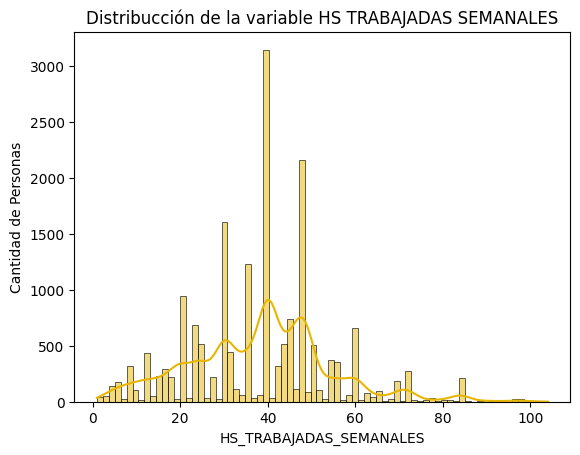

In [507]:
plt.figure()
sns.histplot(data = df_hs_trabajadas,
              x = 'HS_TRABAJADAS_SEMANALES',
             color = '#E7B602',
             kde = True)
plt.title('Distribucción de la variable HS TRABAJADAS SEMANALES')
plt.ylabel('Cantidad de Personas')

In [508]:
df_sueldo_individual = df[df['SUELDO INDIVIDUAL'] > 9] #me interesa la gente que trabaja y se ha puesto un 9 para la gente que no trabaja

Text(0, 0.5, 'Cantidad de Personas')

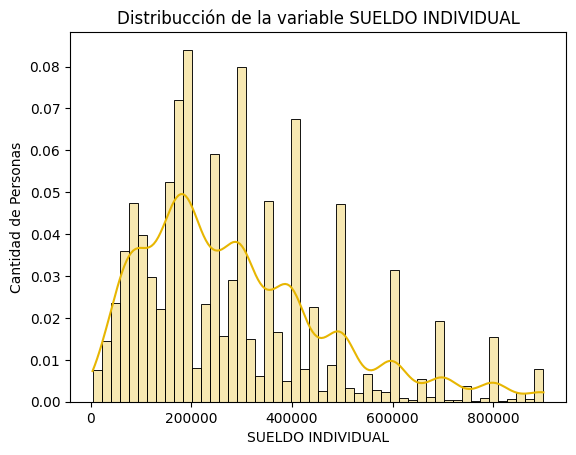

In [509]:
plt.figure()
sns.histplot(data = df_sueldo_individual,
             x = 'SUELDO INDIVIDUAL',
             bins = 50,            
             alpha = 0.3,
             kde = True,
             stat='probability',
             color = '#E7B602')
plt.title('Distribucción de la variable SUELDO INDIVIDUAL')
plt.ylabel('Cantidad de Personas')

Observaciones preliminares:

Se observa que la mayoría de las personas encuestadas tienen nivel secundario, tanto en aglomerados con más de 500.000 habitantes como de menos.

A su vez, se muestra la distribución porcentual de personas encuestadas por diferentes aglomerados. El aglomerado 33 tiene la mayor representación con un 30.5%, lo que indica que más de la tercera parte de los encuestados pertenecen a esta área. Otros aglomerados como el 13, 29, 23 y 10 también tienen una representación notable, cada uno superando el 10% del total de encuestados.
Esto podría indicar cierto sesgo en la muestra, ya que se está considerando una mayor cantidad de personas de este aglomerado. 

En los niveles educativos inferiores (Jardín, Primario, EGB y Secundario), hay una mayor proporción de hombres que han alcanzado estos niveles educativos.
A partir de niveles más altos (Polimodal, Terciario y Universitario), las mujeres predominan, lo que sugiere que más mujeres alcanzan niveles educativos superiores en comparación con los hombres.

Por otro lado, se demuestra cómo el nivel educativo está estrechamente relacionado con el estado laboral y el tiempo de búsqueda de empleo. Los niveles educativos bajos presentan una alta proporción de inactividad laboral y periodos prolongados de búsqueda de empleo.

A medida que aumenta el nivel educativo, especialmente en niveles como "Terciario", hay una mayor tasa de empleo y menores tiempos de búsqueda de trabajo, indicando una mayor empleabilidad para quienes alcanzan un nivel educativo superior. Sin embargo, en niveles educativos intermedios como "Secundario" y "Polimodal", si bien hay una alta tasa de empleo, también se observan casos de personas que llevan más de 1 año buscando empleo.

_____________________________________________________________________________________

## Entrega Final

Como se mencionó al inicio, dentro de este apartado se estudiarán las probabilidades de que una persona tenga empleo (y otras características) a partir de ciertas condiciones socioeconómicas. 

In [510]:
# Librerías para arboles de decision 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Librerias para regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
# Librerias para regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [511]:
# Como el algoritmo a utilizar en esta instancia no admite valores categóricos, se trabajará con transformaciones numéricas para las variables que se listan a continuación:
#Para el calculo de variable target:

# Mas de 40 horas trabajadas por semana?
df['MAS_40_HORAS'] = df['HS_TRABAJADAS_SEMANALES'] >= 40



#Para las variables predictoras
#Es hombre? (Sexo)
df['Hombre'] = df['SEXO'] == 1

#Mayor a 30?
df['Mayor_30'] = df['AÑOS'] >= 30

#Secundario Completo?
df['SECUNDARIO_COMPLETO'] = df['NIVEL_ED'] == 4 

#Universidad completa?
df['UNIVERSIDAD_COMPLETA'] = df['NIVEL_ED'] == 6

#Vive en un aglomerado con más de 500.000 habitantes?
df['Aglomerado_mas500'] = df['MAS_500'] == 'S'

df.head()

,MAS_500,AGLOMERADO,SEXO,AÑOS,ESTADO CIVIL,COBERTURA MÉDICA,LUGAR DE NACIMIENTO,NIVEL_ED,ESTADO LABORAL,CAT_OCUP,...,Outlier_IQR_SI,Outlier_ZScore,Outlier_ZScore_ant,Outlier_IQR_hts,MAS_40_HORAS,Hombre,Mayor_30,SECUNDARIO_COMPLETO,UNIVERSIDAD_COMPLETA,Aglomerado_mas500
0,S,10,2,44,5,1,1,3,1,3,...,0,0,0,0,False,False,True,False,False,True
3,S,10,1,54,2,1,1,4,1,3,...,0,0,0,0,True,True,True,True,False,True
4,S,10,2,53,2,4,1,4,1,3,...,0,0,0,0,False,False,True,True,False,True
5,S,10,2,26,5,4,1,6,1,3,...,0,0,0,0,True,False,False,False,True,True
6,S,10,1,25,5,4,1,5,1,3,...,0,0,0,0,True,True,False,False,False,True


In [512]:
# Los enlisto para transformarlos en matriz: 
lista_predictores = ['Hombre','Mayor_30','SECUNDARIO_COMPLETO','UNIVERSIDAD_COMPLETA','Aglomerado_mas500']
X = df[lista_predictores].values

#### a. Análisis de las probabilidades de trabajar más de 40 horas por semana

In [513]:
# Genero vector de target
y = df['MAS_40_HORAS'].values

In [514]:
# Genero modelo de árbol de decisión 
add1 = DecisionTreeClassifier(random_state = 1111, # Semilla aleatoria
                             criterion = 'gini', # Funcion para medir calidad de la división
                             splitter = 'best', # Estrategia para elegir la división de cada nodo
                             max_depth = 4, # Profundidad máxima del árbol
                             min_samples_leaf = 30 # Mínima cantidad de registros por nodo final
                            )
add1.feature_names = lista_predictores
model = add1.fit(X, y)

In [515]:
print(add1.classes_)

[False  True]


[Text(0.5, 0.9, 'node #0\nHombre <= 0.5\nsamples = 100.0%\nvalue = [0.525, 0.475]\nclass = No trabaja más de 40 horas'),
 Text(0.25, 0.7, 'node #1\nUNIVERSIDAD_COMPLETA <= 0.5\nsamples = 45.0%\nvalue = [0.653, 0.347]\nclass = No trabaja más de 40 horas'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'node #2\nSECUNDARIO_COMPLETO <= 0.5\nsamples = 31.3%\nvalue = [0.665, 0.335]\nclass = No trabaja más de 40 horas'),
 Text(0.0625, 0.3, 'node #3\nMayor_30 <= 0.5\nsamples = 18.0%\nvalue = [0.688, 0.312]\nclass = No trabaja más de 40 horas'),
 Text(0.03125, 0.1, 'node #4\nsamples = 4.8%\nvalue = [0.719, 0.281]\nclass = No trabaja más de 40 horas'),
 Text(0.09375, 0.1, 'node #5\nsamples = 13.2%\nvalue = [0.678, 0.322]\nclass = No trabaja más de 40 horas'),
 Text(0.1875, 0.3, 'node #6\nMayor_30 <= 0.5\nsamples = 13.3%\nvalue = [0.633, 0.367]\nclass = No trabaja más de 40 horas'),
 Text(0.15625, 0.1, 'node #7\nsamples = 3.6%\nvalue = [0.648, 0.352]\nclass = No trabaja más de 40 horas'),
 Text

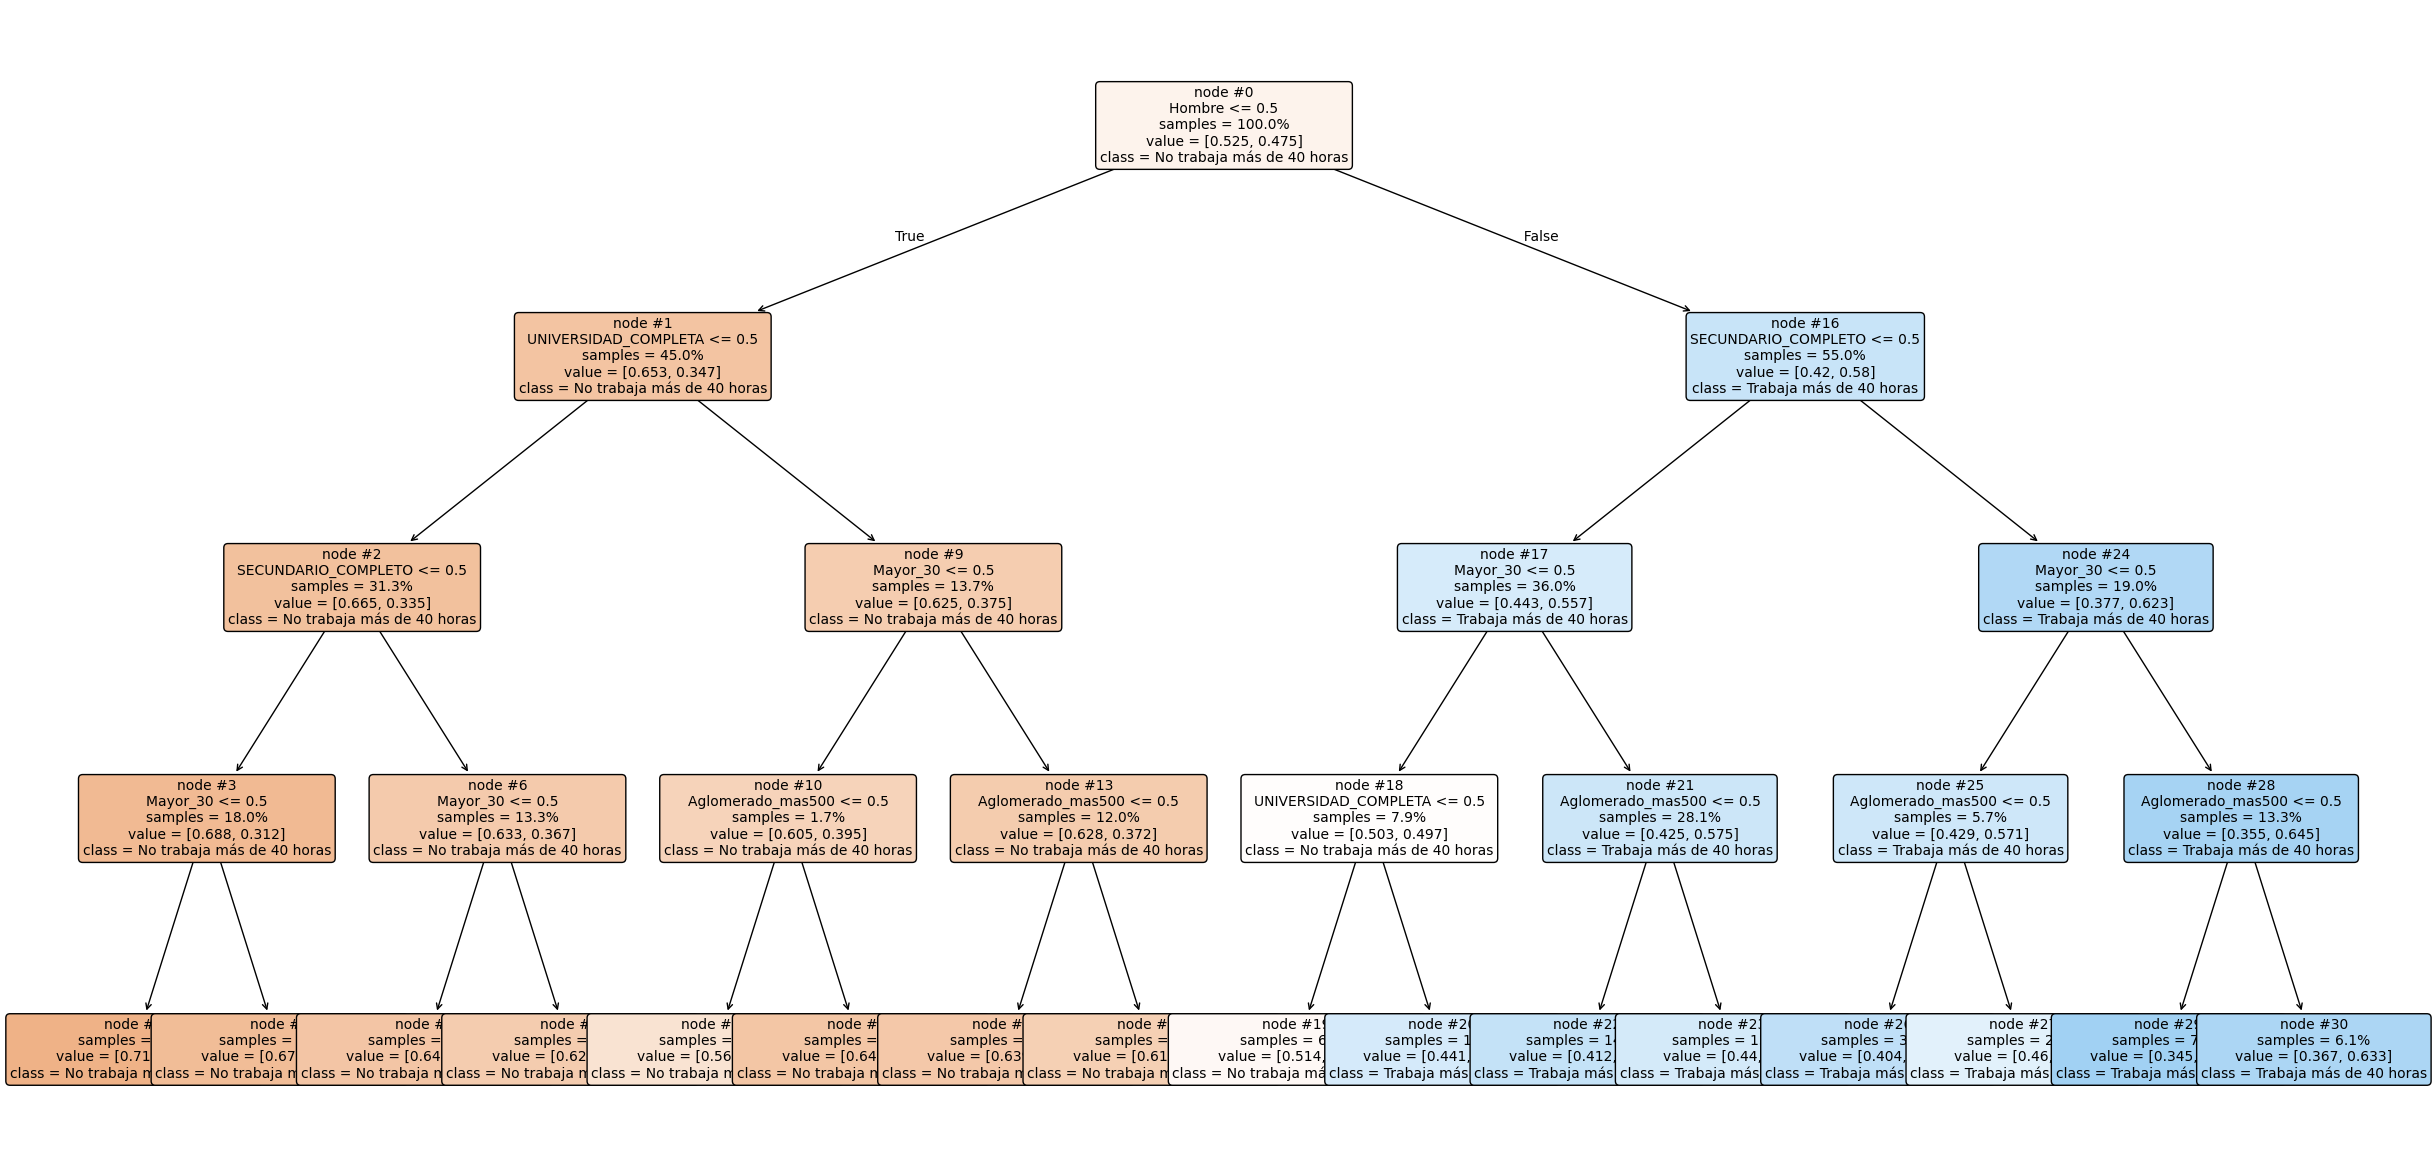

In [516]:
plt.figure(figsize=(30, 15))
plot_tree(add1, 
          filled = True, 
          rounded = True, 
          class_names = ['No trabaja más de 40 horas','Trabaja más de 40 horas'], 
          feature_names = lista_predictores, 
          impurity = False,
          proportion = True,
          node_ids = True,
          fontsize=10)

- Descripción del modelo

En color naranja se muestra el grupo de personas que "No trabaja más de 40 horas", mientras que los nodos en azul representan los grupos que "Trabajan más de 40 horas".

El primer nodo divide los datos basándose en el género (Hombre <= 0.5), lo que indica que el género es un factor significativo para predecir si una persona trabaja más de 40 horas.
Si la persona es mujer, se sigue la rama izquierda (naranja), donde la probabilidad de no trabajar más de 40 horas es mayor.
Si Hombre > 0.5 (hombre), se sigue la rama derecha (azul), donde la probabilidad de trabajar más de 40 horas es más alta.

Rama izquierda (mujeres):
El segundo nodo (nodo #1) se basa en si la persona ha completado la universidad (UNIVERSIDAD_COMPLETA <= 0.5). Si la persona no ha completado la universidad, la probabilidad de no trabajar más de 40 horas sigue siendo alta.
La siguiente característica es el nivel de educación secundaria (SECUNDARIO_COMPLETO <= 0.5), lo que sugiere que el nivel educativo es un factor clave para las mujeres en esta rama.
Otras divisiones incluyen la edad (Mayor_30 <= 0.5) y si la persona vive en un aglomerado de más de 500 habitantes (Aglomerado_+500 <= 0.5), lo que indica que la edad y el lugar de residencia también influyen.

Rama derecha (hombres):
Para los hombres (Hombre > 0.5), el nivel de educación secundaria (SECUNDARIO_COMPLETO <= 0.5) es la primera característica importante. Aquellos que no completaron la secundaria tienen más probabilidades de trabajar más de 40 horas.
Luego, factores como la edad (Mayor_30 <= 0.5), la educación universitaria y el lugar de residencia también son importantes para predecir si trabajan más de 40 horas.

In [517]:
# Genero predicciones  
df['Predict_Arbol'] = add1.predict(df[lista_predictores])
# Agrego la informacion sobre el nodo
df['Predict_Arbol_Nodo'] = add1.apply(df[lista_predictores])

c:\Users\Maite\OneDrive\Escritorio\Git_CoderHouse\CoderHouse\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Maite\OneDrive\Escritorio\Git_CoderHouse\CoderHouse\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [518]:
# Todas las metricas en uno (precision, recall, f1-score)
print(metrics.classification_report(y, df['Predict_Arbol']))

              precision    recall  f1-score   support

       False       0.63      0.63      0.63     11365
        True       0.59      0.60      0.60     10293

    accuracy                           0.61     21658
   macro avg       0.61      0.61      0.61     21658
weighted avg       0.61      0.61      0.61     21658



In [519]:
# Resultado de predicciones
df['Predict_Arbol'].value_counts()

Predict_Arbol
False    11225
True     10433
Name: count, dtype: int64

In [520]:
df['Predict_Arbol_Nodo'].value_counts()

Predict_Arbol_Nodo
22    3152
23    2935
5     2859
8     2098
29    1551
19    1480
14    1359
30    1324
15    1242
4     1041
7      784
26     679
27     554
20     238
12     181
11     181
Name: count, dtype: int64

In [521]:
# Groupby por prediccion de clase: 
resultados = df.groupby('Predict_Arbol').agg(
    Cant = ('Predict_Arbol', 'count'),              
    Cant_exito = ('MAS_40_HORAS', 'sum'),            
    Tasa_exito = ('MAS_40_HORAS', 'mean')    
).reset_index()
resultados

,Predict_Arbol,Cant,Cant_exito,Tasa_exito
0,False,11225,4104,0.365612
1,True,10433,6189,0.593214


El modelo clasifica 11,225 observaciones en la categoría False (aquellos que no trabajan más de 40 horas) y 10,433 en la categoría True (los que sí trabajan más de 40 horas). El modelo se está distribuyendo de manera bastante balanceada entre ambas categorías, sin observar un sesgo hacia una de las clases.

La tasa de éxito para la categoría False es de aproximadamente 36.6%, mientras que para True es de 59.3%, teniendo una mayor precisión al predecir correctamente a las personas en la categoría True en comparación con la categoría False. Esto hace que el modelo encuentra más facilmente o tiene más características predictivas efectivas para los que sí trabajan más de 40 horas (si asumimos esta asociación), en comparación con los que no.
Evidentemente el modelo parece tener un buen desempeño en general al predecir a las personas que trabajan más de 40 horas, pero tiene dificultades para clasificar correctamente la otra categoría. 
Para mejorar el balance de precisión, se podría considerar el sumar la inclusión de nuevas variables que mejoren la capacidad predictiva para la clase False, o bien utilizar otros métodos de clasificación como se verá en la próxima sección.

In [523]:
# Groupby por prediccion de nodo: 
resultados_nodo = df.groupby('Predict_Arbol_Nodo').agg(     
    Cant = ('Predict_Arbol_Nodo', 'count'),              
    Cant_exito = ('MAS_40_HORAS', 'sum'),            
    Tasa_exito = ('MAS_40_HORAS', 'mean')    
).reset_index()
resultados_nodo.rename(columns={'Tasa_exito': 'Predict_Prob_Arbol'}, inplace=True)
resultados_nodo

,Predict_Arbol_Nodo,Cant,Cant_exito,Predict_Prob_Arbol
0,4,1041,293,0.281460
1,5,2859,922,0.322490
2,7,784,276,0.352041
3,8,2098,782,0.372736
4,11,181,79,0.436464
5,12,181,64,0.353591
6,14,1359,491,0.361295
7,15,1242,477,0.384058
8,19,1480,720,0.486486
9,20,238,133,0.558824


In [524]:
resultados_nodo

,Predict_Arbol_Nodo,Cant,Cant_exito,Predict_Prob_Arbol
0,4,1041,293,0.281460
1,5,2859,922,0.322490
2,7,784,276,0.352041
3,8,2098,782,0.372736
4,11,181,79,0.436464
5,12,181,64,0.353591
6,14,1359,491,0.361295
7,15,1242,477,0.384058
8,19,1480,720,0.486486
9,20,238,133,0.558824


La tasa de predicción exitosa, que representa la proporción de personas correctamente clasificadas en cada nodo, varía considerablemente entre nodos.
En nodos como el 20, 29 y 30, la tasa de predicción exitosa es relativamente alta (55% a 63%), lo que indica que estos nodos tienen una buena precisión en la predicción de los resultados.
Los nodos con tasas de éxito más bajas, como el nodo 4 (28%), indican que las divisiones en esos nodos no son tan efectivas para predecir correctamente la categoría de las personas. De igual manera, la variación en la tasa de predicción exitosa sugiere que el modelo tiene áreas de mayor y menor precisión. Es posible que ciertos nodos (como los superiores, que tienen tasas de éxito bajas) incluyan características que no son tan predictivas de la variable objetivo. En contraste, los nodos con tasas de éxito más altas pueden estar en áreas donde las características se combinan de manera más efectiva para predecir correctamente.

In [525]:
# Genero la columna con la predicción 
df = df.merge(resultados_nodo[['Predict_Arbol_Nodo','Predict_Prob_Arbol']],
              left_on = 'Predict_Arbol_Nodo',
              right_on = 'Predict_Arbol_Nodo',
              how = 'left')
df.head()

,MAS_500,AGLOMERADO,SEXO,AÑOS,ESTADO CIVIL,COBERTURA MÉDICA,LUGAR DE NACIMIENTO,NIVEL_ED,ESTADO LABORAL,CAT_OCUP,...,Outlier_IQR_hts,MAS_40_HORAS,Hombre,Mayor_30,SECUNDARIO_COMPLETO,UNIVERSIDAD_COMPLETA,Aglomerado_mas500,Predict_Arbol,Predict_Arbol_Nodo,Predict_Prob_Arbol
0,S,10,2,44,5,1,1,3,1,3,...,0,False,False,True,False,False,True,False,5,0.322490
1,S,10,1,54,2,1,1,4,1,3,...,0,True,True,True,True,False,True,True,30,0.632931
2,S,10,2,53,2,4,1,4,1,3,...,0,False,False,True,True,False,True,False,8,0.372736
3,S,10,2,26,5,4,1,6,1,3,...,0,True,False,False,False,True,True,False,12,0.353591
4,S,10,1,25,5,4,1,5,1,3,...,0,True,True,False,False,False,True,False,19,0.486486


<Axes: xlabel='None', ylabel='Predict_Prob_Arbol'>

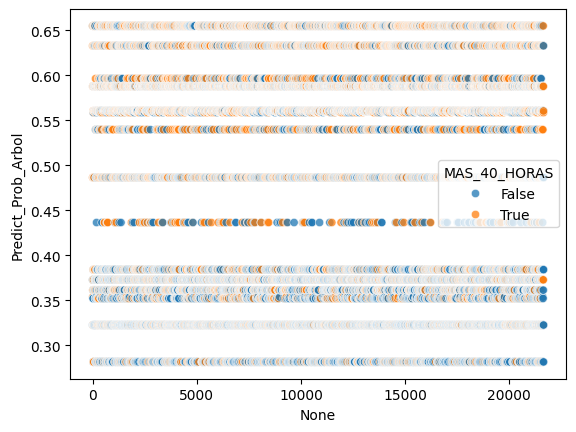

In [526]:
# Graficamente 
g1 = plt.figure()
sns.scatterplot(data = df,
                x = df.index,
                y = 'Predict_Prob_Arbol',  
                alpha = 0.75,
                hue = 'MAS_40_HORAS')

En este gráfico, al igual que en el árbol de decisión, se observa una tendencia en la distribución de colores. 
En el scatterplot, la mitad superior es predominantemente naranja "No trabaja más de 40 horas", y la de abajo, predominantemente azul "Trabaja más de 40 horas". Con el árbol de decisión sucede algo parecido, las ramas superiores tienden a ser más naranjas, mientras que las ramas inferiores son predominantemente azules. Esto significa que, para las divisiones iniciales (en base a variables como el género y el nivel educativo), es más común encontrar individuos que no trabajan más de 40 horas.
En otras palabras, las características generales que se evalúan al inicio (como Hombre, UNIVERSIDAD_COMPLETA y SECUNDARIO_COMPLETO) favorecen la clasificación hacia "No trabaja más de 40 horas" en una mayor proporción. De forma similar sucede con la rama azul.

<Axes: xlabel='Predict_Arbol_Nodo', ylabel='Predict_Prob_Arbol'>

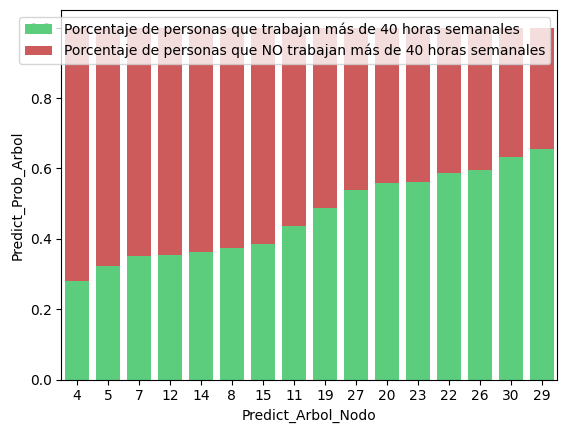

In [527]:
# Barplot por nodo 
resultados_nodo['Tasa_exito'] = (1 - resultados_nodo['Predict_Prob_Arbol'])
resultados_nodo = resultados_nodo.sort_values('Predict_Prob_Arbol')

# Crear el barplot ordenado
sns.barplot(data=resultados_nodo,
            x='Predict_Arbol_Nodo',
            y='Predict_Prob_Arbol', 
            label='Porcentaje de personas que trabajan más de 40 horas semanales',
            color='#48E074',
            order=resultados_nodo['Predict_Arbol_Nodo'])

sns.barplot(data=resultados_nodo, 
            x='Predict_Arbol_Nodo', 
            y='Tasa_exito', 
            bottom=resultados_nodo['Predict_Prob_Arbol'], 
            label='Porcentaje de personas que NO trabajan más de 40 horas semanales',
            color='#E04848',
            order=resultados_nodo['Predict_Arbol_Nodo'])

- Conclusiones parciales sobre el primer modelo

El género es la característica más importante, ya que es la primera división del árbol. Las mujeres tienden a no trabajar más de 40 horas, mientras que los hombres tienen más probabilidades de trabajar más de 40 horas. Si bien no se especifican las causas, pero uno puede suponer a que esto se debe a otros trabajos "invisibles" que tiene la mujer sin ser remunerados, como es el mantenimiento de la casa, lo hijos, etc.

Por otro lado, el nivel educativo también tiene un peso considerable tanto para hombres como para mujeres en cuanto a las horas trabajadas por semana. Aquellos con menor educación secundaria o universitaria tienden a trabajar más horas, especialmente los hombres.

La edad y e lugar de residencia, en menor medida, también son factores importantes, especialmente en ramas más profundas del árbol. Personas jóvenes o que viven en áreas menos pobladas tienen una probabilidad diferente de trabajar más de 40 horas.

Con base en esta tabla, que presenta los resultados de predicción del modelo de árbol de decisión en diferentes nodos, podemos hacer algunas observaciones sobre el desempeño del modelo.

- Ahora realizo el mismo análisis pero utilizando un un modelo Random Forest para resultados binarios.

In [528]:
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test) 

In [529]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([1360,  921,  752, 1299], dtype=int64)

In [530]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.64      0.60      0.62      2281
        True       0.59      0.63      0.61      2051

    accuracy                           0.61      4332
   macro avg       0.61      0.61      0.61      4332
weighted avg       0.62      0.61      0.61      4332



Aquí se visualizan los resultados de precision y recall utilizando el modelo Random Forest. Se observa que los valores son muy similares a los obtenidos con el modelo de árbol de decisión convecional (esto puede darse a la semenjanza/naturaleza de ambos modelos).

- Ahora realizo el mismo análisis pero utilizando un regresión logística, ya que el resultado que busco es una variable categórica dicotómica, es decir, donde la respuesta para este tipo de variable solo podrá ser sí o no.

In [531]:
df['MAS_40_HORAS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21658 entries, 0 to 21657
Series name: MAS_40_HORAS
Non-Null Count  Dtype
--------------  -----
21658 non-null  bool 
dtypes: bool(1)
memory usage: 21.3 KB


In [532]:
df['AÑOS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21658 entries, 0 to 21657
Series name: AÑOS
Non-Null Count  Dtype
--------------  -----
21658 non-null  int64
dtypes: int64(1)
memory usage: 169.3 KB


In [533]:
df['MAS_40_HORAS'].replace({False: 0, True: 1}, inplace=True)

C:\Users\Maite\AppData\Local\Temp\ipykernel_10940\3198584991.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MAS_40_HORAS'].replace({False: 0, True: 1}, inplace=True)
C:\Users\Maite\AppData\Local\Temp\ipykernel_10940\3198584991.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MAS_40_H

In [534]:
valores_unicos = df['MAS_40_HORAS'].unique()
print(valores_unicos)

[0 1]


In [535]:
print(df[['MAS_40_HORAS', 'AÑOS']].isnull().sum())

MAS_40_HORAS    0
AÑOS            0
dtype: int64


In [536]:
# Genero el modelo
formula = 'MAS_40_HORAS ~ AÑOS + SEXO + NIVEL_ED + MAS_500'
reg_log = smf.logit(formula, data=df).fit()

# Ver el resumen de resultados
print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.663709
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           MAS_40_HORAS   No. Observations:                21658
Model:                          Logit   Df Residuals:                    21653
Method:                           MLE   Df Model:                            4
Date:                Thu, 31 Oct 2024   Pseudo R-squ.:                 0.04077
Time:                        19:52:21   Log-Likelihood:                -14375.
converged:                       True   LL-Null:                       -14986.
Covariance Type:            nonrobust   LLR p-value:                2.621e-263
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1571      0.073     15.927      0.000       1.015       1.299
MAS_500[T.S]    -0.0810

In [537]:
# Predicciones 
df['Predict_Prob_RegLog'] = reg_log.predict(df)

<Axes: xlabel='None', ylabel='Predict_Prob_RegLog'>

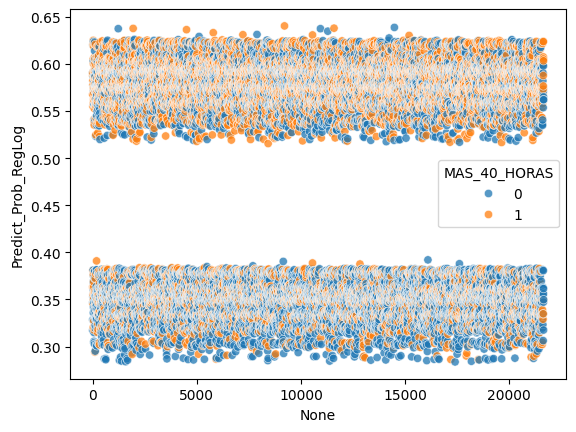

In [538]:
# Graficamente 
g1 = plt.figure()
sns.scatterplot(data = df,
                x = df.index,
                y = 'Predict_Prob_RegLog',  
                alpha = 0.75,
                hue = 'MAS_40_HORAS')

In [539]:
# Groupby por prediccion de clase: 
df['Predict_RegLog'] = df['Predict_Prob_RegLog'] > 0.5
resultados = df.groupby('Predict_RegLog').agg(
    Cant = ('Predict_RegLog', 'count'),              
    Cant_Sup = ('MAS_40_HORAS', 'sum'),            
    Tasa_Sup = ('MAS_40_HORAS', 'mean')    
).reset_index()
resultados

,Predict_RegLog,Cant,Cant_Sup,Tasa_Sup
0,False,9745,3384,0.347255
1,True,11913,6909,0.579955


In [540]:
# Groupby por prediccion de decil: 
bin_edges = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
bin_labels = range(1, 11)
df['Predict_RegLog_Bin'] = pd.cut(df['Predict_Prob_RegLog'], 
                                  bins=bin_edges, 
                                  labels=bin_labels, 
                                  include_lowest=True)

In [544]:
resultados_nodo2 = df.groupby('Predict_RegLog_Bin').agg(     
    Cant = ('Predict_RegLog_Bin', 'count'),              
    Cant_exito2 = ('MAS_40_HORAS', 'sum'),            
    Tasa_exito2 = ('MAS_40_HORAS', 'mean')    
).reset_index()
resultados_nodo2

C:\Users\Maite\AppData\Local\Temp\ipykernel_10940\1274195109.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultados_nodo2 = df.groupby('Predict_RegLog_Bin').agg(


,Predict_RegLog_Bin,Cant,Cant_exito2,Tasa_exito2
0,1,0,0,NaN
1,2,0,0,NaN
2,3,162,32,0.197531
3,4,9583,3352,0.349786
4,5,0,0,NaN
5,6,9742,5651,0.580066
6,7,2171,1258,0.579456
7,8,0,0,NaN
8,9,0,0,NaN
9,10,0,0,NaN


Conclusiones preliminares sobre la regresión logística

- Coeficientes e Interpretación de Variables
En la regresión logística, los coeficientes de las variables indican la dirección y el efecto de cada una en la probabilidad de que una persona trabaje más de 40 horas:

MAS_500: Este coeficiente es negativo y significativo (p = 0.004), lo que sugiere que vivir en una zona de más de 500 habitantes reduce ligeramente la probabilidad de trabajar más de 40 horas.
SEXO: Tiene un efecto negativo significativo (p < 0.001), indicando que el género (siendo mujer, asumiendo que esta es la codificación) disminuye la probabilidad de trabajar más de 40 horas.
NIVEL_ED: Tiene un efecto positivo y significativo, lo que implica que a mayor nivel educativo, aumenta la probabilidad de trabajar más de 40 horas.


--> Esto da al modelo logístico una ventaja interpretativa sobre el árbol, al permitirnos entender el efecto de cada variable.

El Pseudo R-squared de 0.04077 indica que el modelo explica una porción pequeña de la variabilidad en la variable de respuesta (igualmente los modelos logísticos suelen tener Pseudo R-squared bajos), pero igualmente se puede mejorar.

### Comparo los dos modelos

Con base en los resultados de los modelos de árbol de decisión y regresión logística, se puede hacer una comparación en términos de su rendimiento y características predictivas:

- Árbol de Decisión: El árbol tiene una tasa de éxito del 36.6% para la clase False y del 59.3% para la clase True, es decir que el modelo de árbol de decisión es más efectivo para predecir la clase True que la False. En la regresión logística, sucede algo similar: la tasa de éxito es de 34.7% para la clase False y 57.9% para la clase True.

- Ambos modelos tienen un rendimiento bastante similar en términos de precisión general, aunque el árbol de decisión tiene una ligera ventaja en términos de tasa de éxito para ambas clases.

--> Esto sugiere que el árbol de decisión podría ser un poco más adecuado si la precisión en la predicción es la prioridad, aunque la diferencia no es drástica.

## b. Modelo regresion para predecir los sueldos individuales

Ahora compararé distintos modelos de regresión para predecir los sueldos individuales y analizar cuál de los modelos lo predice mejor.

In [547]:
#Selección de Variables de Interés
#Variables independientes
X = df[['AGLOMERADO', 'SEXO', 'AÑOS', 'NIVEL_ED', 'ANTIGÜEDAD', 'HS_TRABAJADAS_SEMANALES','CANT. DE OCUPACIONES','ESTADO CIVIL']]

# Variable dependiente
y = df['SUELDO INDIVIDUAL']

In [548]:
# Conjunto de entrenamiento y prueba (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [549]:
# Creo el modelo de regresión lineal
model = LinearRegression()

# Entreno el modelo
model.fit(X_train, y_train)

# Pregido en el conjunto de prueba
y_pred = model.predict(X_test)

In [550]:
def evaluar_modelo(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Error cuadrático medio (MSE): {mse:.2f}')
    print(f'Error cuadrático medio raíz (RMSE): {rmse:.2f}')
    print(f'Coeficiente de determinación (R²): {r2:.2f}')
    return mse, rmse, r2

In [551]:
# Crear y entrenar el modelo de regresión lineal
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Predecir y evaluar
y_pred_lr = modelo_lr.predict(X_test)
print("Resultados de Regresión Lineal:")
evaluar_modelo(y_test, y_pred_lr)

Resultados de Regresión Lineal:
Error cuadrático medio (MSE): 39736037994.37
Error cuadrático medio raíz (RMSE): 199339.00
Coeficiente de determinación (R²): 0.07


(39736037994.36566, 199339.00269231224, 0.06823244513453053)

La regresión lineal muestra un error de predicción considerable con un RMSE cercano a 199,339 pesos, y un R² de solo 0.068, lo cual indica que el modelo solo explica alrededor del 6.8% de la varianza en el sueldo individual. Esto sugiere que el modelo no captura bien las relaciones entre las variables predictoras y el sueldo. Ahora anaizaremos la misma situación utilizando el modelo de Random Forest.

In [552]:
# Crear y entrenar el modelo de Random Forest
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

# Predecir y evaluar
y_pred_rf = modelo_rf.predict(X_test)
print("\nResultados de Random Forest:")
evaluar_modelo(y_test, y_pred_rf)


Resultados de Random Forest:
Error cuadrático medio (MSE): 40399297734.22
Error cuadrático medio raíz (RMSE): 200995.77
Coeficiente de determinación (R²): 0.05


(40399297734.22007, 200995.7654634049, 0.05267971423235873)

El modelo de Random Forest tiene un rendimiento similar al de la regresión lineal, con un RMSE un poco mayor (200,996) y un R² ligeramente menor (0.053). Esto implica que el modelo sigue sin capturar adecuadamente la varianza en los sueldos. Aunque Random Forest suele captar mejor patrones no lineales, en este caso, parece que las variables utilizadas no aportan suficiente información para mejorar las predicciones. Ahora anaizaremos la misma regresión situación utilizando el modelo de Gradient Boosting.

In [553]:
# Crear y entrenar el modelo de Gradient Boosting
modelo_gb = GradientBoostingRegressor(random_state=42)
modelo_gb.fit(X_train, y_train)

# Predecir y evaluar
y_pred_gb = modelo_gb.predict(X_test)
print("\nResultados de Gradient Boosting:")
evaluar_modelo(y_test, y_pred_gb)


Resultados de Gradient Boosting:
Error cuadrático medio (MSE): 36388486812.27
Error cuadrático medio raíz (RMSE): 190757.67
Coeficiente de determinación (R²): 0.15


(36388486812.27421, 190757.6651468407, 0.14672893691276578)

In [554]:
resultados = pd.DataFrame({
    "Modelo": ["Regresión Lineal", "Random Forest", "Gradient Boosting"],
    "MSE": [mean_squared_error(y_test, y_pred_lr),
            mean_squared_error(y_test, y_pred_rf),
            mean_squared_error(y_test, y_pred_gb)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test, y_pred_gb))],
    "R²": [r2_score(y_test, y_pred_lr),
           r2_score(y_test, y_pred_rf),
           r2_score(y_test, y_pred_gb)]
})

print(resultados)

              Modelo           MSE           RMSE        R²
0   Regresión Lineal  3.973604e+10  199339.002692  0.068232
1      Random Forest  4.039930e+10  200995.765463  0.052680
2  Gradient Boosting  3.638849e+10  190757.665147  0.146729


Gradient Boosting es el modelo con el mejor rendimiento entre los tres, con un RMSE más bajo (190,758) y un R² de 0.147, lo cual indica que explica el 14.7% de la varianza del sueldo. Aunque este modelo mejora ligeramente la capacidad de predicción, el R² sigue siendo bajo, lo cual sugiere que otros factores importantes podrían estar faltando en el conjunto de datos o que existe alta variabilidad en los sueldos que no está siendo capturada.

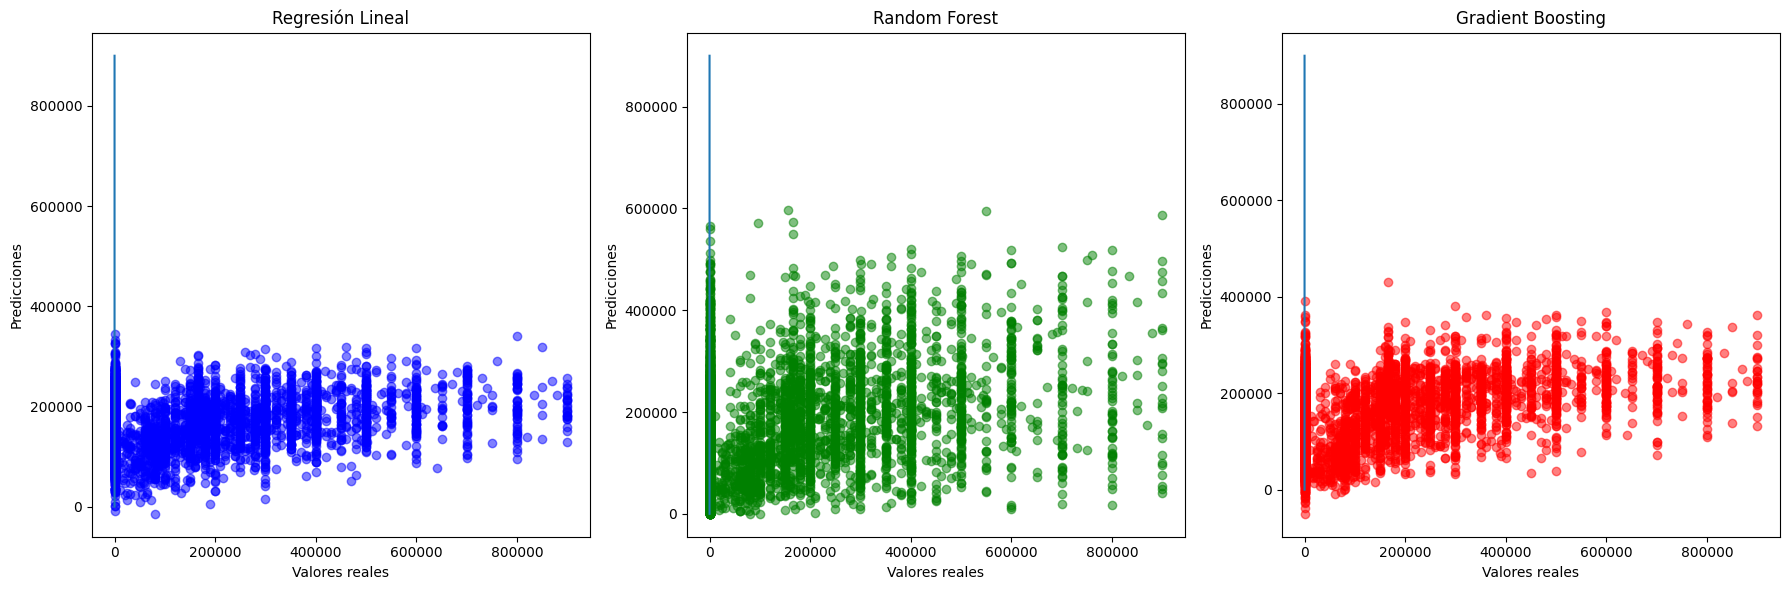

In [555]:
# Graficamos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Modelo de Regresión Lineal
axs[0].scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
axs[0].plot([y_test.min(), y_test.max()])
axs[0].set_title('Regresión Lineal')
axs[0].set_xlabel('Valores reales')
axs[0].set_ylabel('Predicciones')

# Modelo de Random Forest
axs[1].scatter(y_test, y_pred_rf, color='green', alpha=0.5)
axs[1].plot([y_test.min(), y_test.max()])
axs[1].set_title('Random Forest')
axs[1].set_xlabel('Valores reales')
axs[1].set_ylabel('Predicciones')

# Modelo de Gradient Boosting
axs[2].scatter(y_test, y_pred_gb, color='red', alpha=0.5)
axs[2].plot([y_test.min(), y_test.max()])
axs[2].set_title('Gradient Boosting')
axs[2].set_xlabel('Valores reales')
axs[2].set_ylabel('Predicciones')

plt.tight_layout()
plt.show()

Por lo que se ve, ninguno de los modelos parece ser muy efectivo para predecir el sueldo individual de manera precisa, ya que todos presentan altos errores de predicción (RMSE alrededor de 190,000-200,000 pesos) y bajos valores de R² (todos menores a 0.15). 
Esto podría indicar que hay variables insuficientes o mal representadas no tenidas en cuenta en el análisis. Esto puede darse por la falta de información en la misma muestra, de forma que no están presentes en el modelo, y limita su capacidad de predicción.